# PART ONE 

• **DOMAIN**: Telecom

• **CONTEXT**: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

• **DATA DESCRIPTION**: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

    • Customers who left within the last month – the column is called Churn
    
    • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    
    • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
    • Demographic info about customers – gender, age range, and if they have partners and dependents

• **PROJECT OBJECTIVE**: Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.

# ANSWER: 

**Objectives** : 

    Here our objective is to identify podential customers who have higher probability to churn via different models and analysis.     
    Telecom companies often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

    Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

    We need to derive pattern out of data given to predict pattern of churn which in turns determine the potential customer to focus on.

## 1. Import and warehouse data: 

**• Import all the given datasets. Explore shape and size.**

**• Merge all datasets onto one and explore final shape and size.**

In [531]:
#Import Libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,f1_score
import os
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
# Confusion Matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from math import sqrt


**Importing Data and Exploring**

In [532]:
#Reading data for TelcomCustomer-Churn_1.csv
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
#Reading data for TelcomCustomer-Churn_2.csv
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [533]:
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [534]:
df2.head()

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check           29.85   
1        One year               No               Mailed check           56.95   
2  Month-to-month              Yes               Mailed check           53.85   
3        One year               No  Bank transfer (automatic)           42.30   
4  Month-to-month              Yes           Electronic check           70.70   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [535]:
df1.shape

(7043, 10)

**df1 has 7043 row and 10 columns**

In [536]:
df2.shape

(7043, 11)

**df1 has 7043 row and 11 columns**

In [537]:
columns1 = df1.columns
columns2 = df2.columns

set(columns1)- (set(columns1)-set(columns2))

set()

#### ASSUMPTION:
**Since we dont have any column in common and we dont have any customer ID common, we are assuming row in data 1 corresponds to row in data 2**

In [538]:
df=df1.join(df2)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [539]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [540]:
df.shape

(7043, 21)

**Now we have same number of rows(7043) but 21 columns**

In [541]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Data cleansing:

**• Missing value treatment**

**• Convert categorical attributes to continuous using relevant functional knowledge**

**• Drop attribute/s if required using relevant functional knowledge**

**• Automate all the above steps**

In [543]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [544]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [545]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**There are 11 missing values for Total Charges. Lets remove these 11 rows from our data set**

In [546]:
df[np.isnan(df['TotalCharges'])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [547]:
df.dropna(inplace=True)

In [548]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [549]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

**• Convert categorical attributes to continuous using relevant functional knowledge**

In [550]:
df.shape

(7032, 20)

In [551]:
df_with_labels = df.copy()
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   
5              2                1               0             0   
6              2                1               0             2   
7              1                0               2             0   
8              2                1               0             0   
9              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   
5                 2            0            2                2         0   
6                 0            0            2                0         0   
7                 0            0            0                0         0   
8                 2            2            2                2         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  
5                 1              2           99.65        820.50      1  
6                 1              1           89.10       1949.40      0  
7                 0              3           29.75        301.90      0  
8                 1              2          104.80       3046.05      1  
9                 0              0           56.15       3487.95      0

In [552]:
df.gender.size

7032

**• Automate all the above steps**

In [553]:
def data_cleansing(data, numerical_object):
    
    # • Missing value treatment
    # Converting numerical object to a numerical data type.
    for column in numerical_object:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    if data.isnull().sum().sum()>0:
        data.dropna(inplace=True)
        
    # • Convert categorical attributes to continuous using relevant functional knowledge
    data = data.apply(lambda x: object_to_int(x))  #object_to_int is defined above
    
    # • Drop attribute/s if required using relevant functional knowledge
    for column in data.columns:
        if data[column].nunique()== data[column].size:
            data = data.drop([column], axis = 1)
    
    return data

############################################################################################
# Testing
numerical_object = ["TotalCharges"]
data_01=df1.join(df2)
   
data_cleaned = data_cleansing(data_01, numerical_object)
data_cleaned

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7032 rows x 20 columns]

## 3. Data analysis & visualisation:

**• Perform detailed statistical analysis on the data.**

**• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.**

In [554]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7032.000000       7032.000000  7032.000000  7032.000000   
mean       0.905859          0.903868     0.796359     0.984926   
std        0.880394          0.880178     0.861674     0.885285   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7032.000000  7032.000000       7032.000000    7032.000000   
mean          0.992890     0.688567          0.592719       1.573237   
std           0.885385     0.832934          0.491363       1.067504   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7032.000000   7032.000000  7032.000000  
mean        64.798208   2283.300441     0.265785  
std         30.085974   2266.771362     0.441782  
min         18.250000     18.800000     0.000000  
25%         35.587500    401.450000     0.000000  
50%         70.350000   1397.475000     0.000000  
75%         89.862500   3794.737500     1.000000  
max        118.750000   8684.800000     1.000000

In [555]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

**1. Here we can see that for tenure mean and median have very less difference, hence the distribution is quite normal**

**2. For MonthlyCharges mean is slightly lesser than median**

**3. For TotalCharges we can see that the data is not scaled and mean and median has difference. As mean > median,  positive skewness exists**

In [556]:
categorical_columns=df.drop(numerical_cols, axis=1).columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [557]:
df_cat = df.copy()
for category in categorical_columns:
    df_cat[category] = df[category].astype('category')
df_cat.drop(numerical_cols, axis=1,inplace=True)
df_cat.describe()

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
count     7032           7032     7032        7032          7032   
unique       2              2        2           2             2   
top          1              0        0           0             1   
freq      3549           5890     3639        4933          6352   

        MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count            7032             7032            7032          7032   
unique              3                3               3             3   
top                 0                1               0             0   
freq             3385             3096            3497          3087   

        DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count               7032         7032         7032             7032      7032   
unique                 3            3            3                3         3   
top                    0            0            0                0         0   
freq                3094         3472         2809             2781      3875   

        PaperlessBilling  PaymentMethod  Churn  
count               7032           7032   7032  
unique                 2              4      2  
top                    1              2      0  
freq                4168           2365   5163

**Finding unique items for each columns**

In [558]:
for column in df_with_labels.columns:
    print(column+" : " + str(df_with_labels[column].unique()) + "\n")

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges : [29.85 56.95 53.85 .

In [559]:
for category in categorical_columns:
    df_with_labels[category] = df_with_labels[category].astype('category')
df_with_labels.astype(object).describe()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
count    7032           7032    7032       7032    7032         7032   
unique      2              2       2          2      72            2   
top      Male              0      No         No       1          Yes   
freq     3549           5890    3639       4933     613         6352   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   

              Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
count             7032             7032              7032         7032.00   
unique               3                2                 4         1584.00   
top     Month-to-month              Yes  Electronic check           20.05   
freq              3875             4168              2365           61.00   

        TotalCharges Churn  
count         7032.0  7032  
unique        6530.0     2  
top             20.2    No  
freq            11.0  5163

**gender	: Gender is almost equally distributed, hence we can say that we have data available for both categories euqally.**

**SeniorCitizen	: Here we have more data non-senior citizen data.**

**Partner	: Partner is almost equally distributed**

**Dependents	: Dependents data have more data on non-dependent category**	

**PhoneService	: There are more customer with phone services**

**MultipleLines	: Customers without multiple lines are maximum**

**InternetService	: Customer with fiber optic internet sevice are maximum**

**OnlineSecurity	: Customer with No online security are highest**

**OnlineBackup	: Customer with No online backup are highest**

**DeviceProtection	: Customer with No device protection are highest**

**TechSupport	: Customer with No tech support are highest**

**StreamingTV	: Customer with No streaming tv are highest**

**StreamingMovies	: Customer with No streaming movies are highest**

**Contract	: Customer with month-to-month are highest**

**PaperlessBilling	: Customer with paper billing are highest**

**PaymentMethod	: Customer with electronic checks are highest**

**We can infer that many of the existing customers are not using the services and data for users not using services are more. As we see customer with not using multiple services are highest for many of the columns**


**We can explore the data visually now with various statistical analysis**

### Univariate Analysis

There is one property in the dataset that contains discrete values; class. The chart types we can use for the single discrete value distribution are; countplot(which is pandas bar graph) and percentage distribution.

In [560]:
def univariate_analysis_piechart_bargraph(dataset,criteria):
    f,axes=plt.subplots(1,2,figsize=(17,7))
    dataset[criteria].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
    sns.countplot(criteria,data=dataset,ax=axes[1])
    axes[0].set_title(f'{criteria} Variable Pie Chart')
    axes[1].set_title(f'{criteria} Variable Bar Graph')
    plt.show()

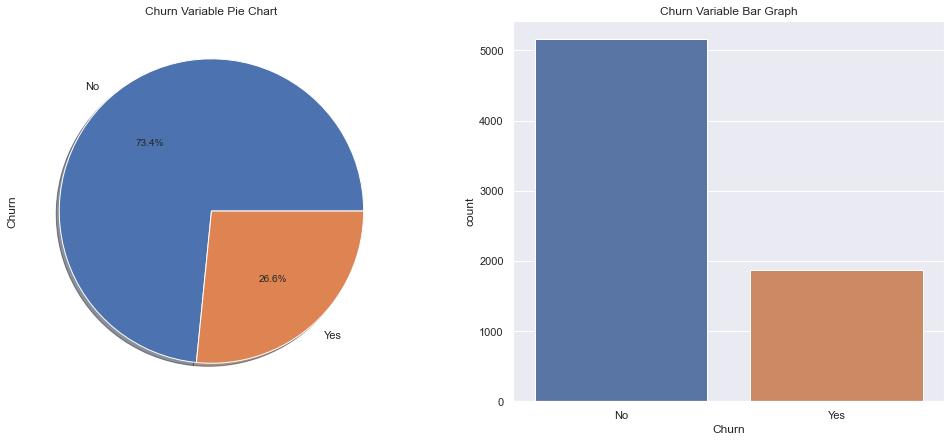

In [561]:
univariate_analysis_piechart_bargraph(df_with_labels, "Churn")

**We can see that the churn data is not even. 73.4% percent are non-churn data and 26.6% are churn data.**

**Here we have lesser churn data which is not good as we are predicting what factors leads to churn.**

**This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.**

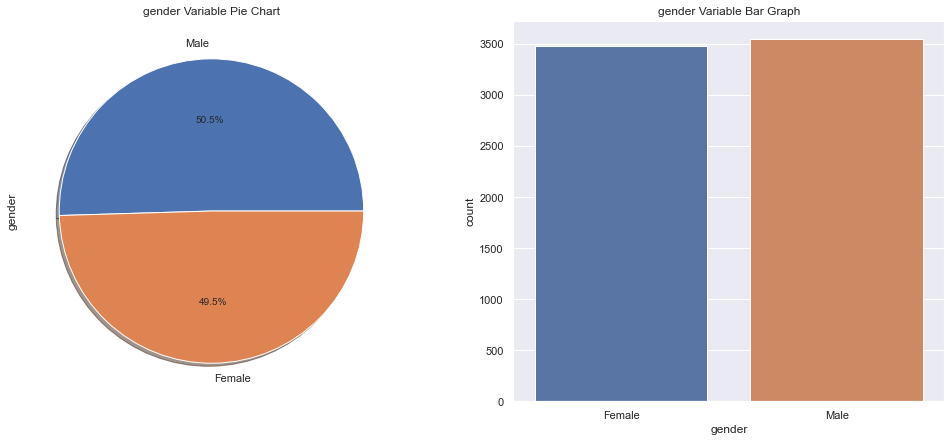

In [562]:
univariate_analysis_piechart_bargraph(df_with_labels, "gender")

**Here data are equally distributed for Male and female.**

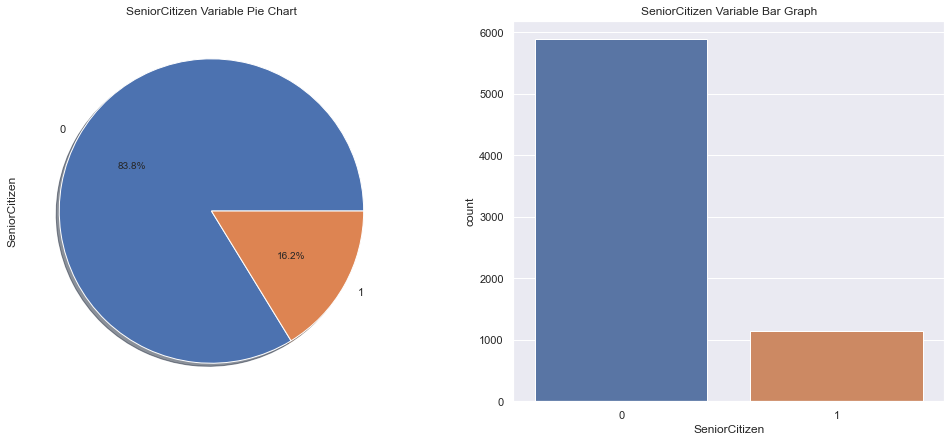

In [563]:
univariate_analysis_piechart_bargraph(df_with_labels, "SeniorCitizen")

**Here we have more young people than senior citizen data. We have 16.2% senior citizen data**

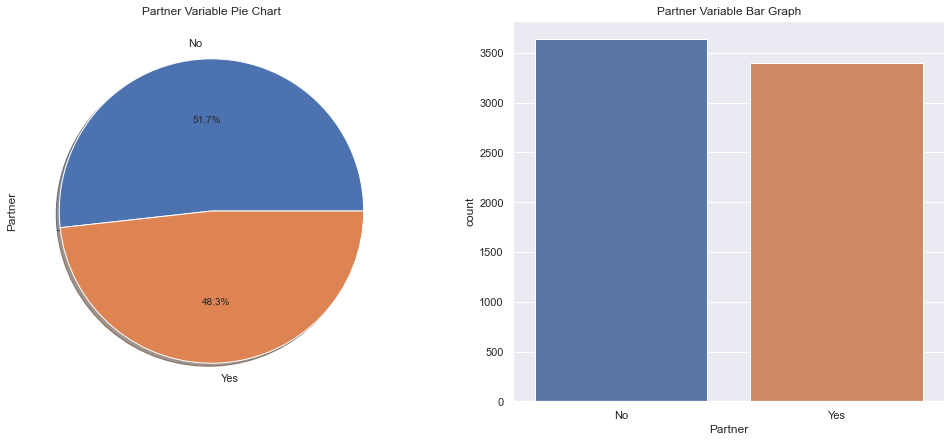

In [564]:
univariate_analysis_piechart_bargraph(df_with_labels, "Partner")

**Here we can see that data is almost equally distributed.**

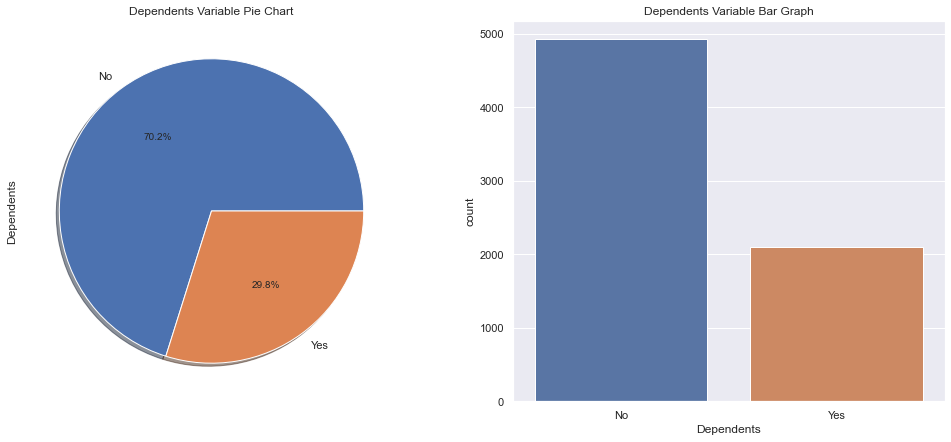

In [565]:
univariate_analysis_piechart_bargraph(df_with_labels, "Dependents")

**Here we have more data on customer without dependents 70.2%**

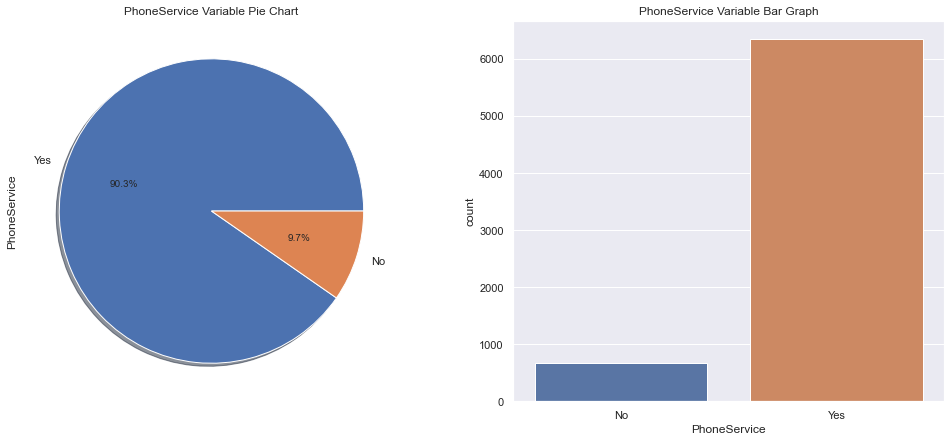

In [566]:
univariate_analysis_piechart_bargraph(df_with_labels, "PhoneService")

**The data shows lot of people prefer phone service as 90.3% have opted for phone services.**

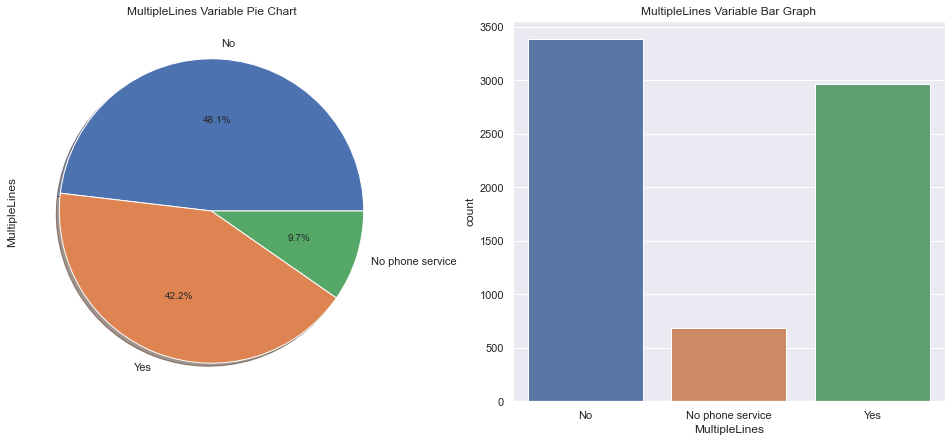

In [567]:
univariate_analysis_piechart_bargraph(df_with_labels, "MultipleLines")

**Here we can see that the customer with multiple lines are 42.2%, while customer with out multiple lines are 48.1% and 9.7 % customer have no phone service.**

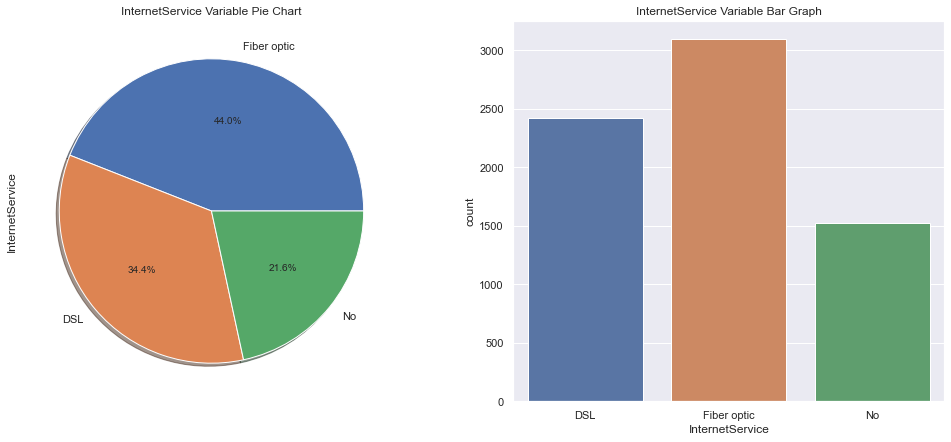

In [568]:
univariate_analysis_piechart_bargraph(df_with_labels, "InternetService")

**44% customer have fiber optic internet service, 34.4% customer have DSL and 21.6% customer have No internet service.**

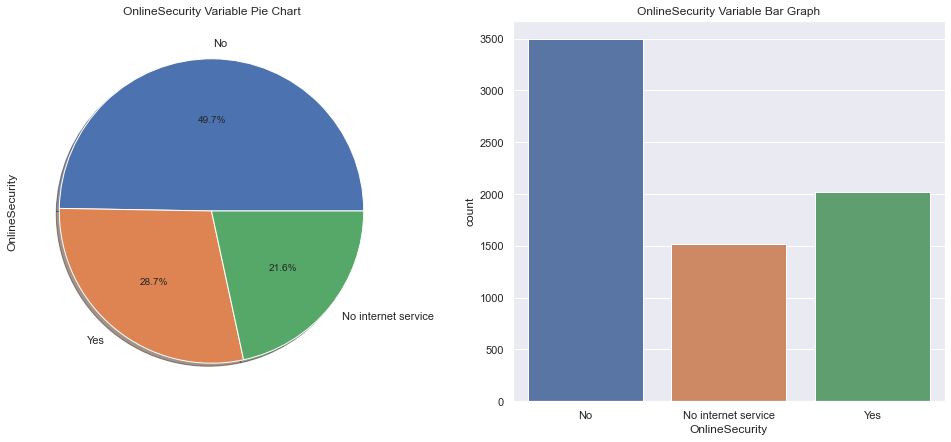

In [569]:
univariate_analysis_piechart_bargraph(df_with_labels, "OnlineSecurity")

**Here we can see that 28.7% customer have online security, 49.7% customer have No online security and 21.6% customer have No internet service**

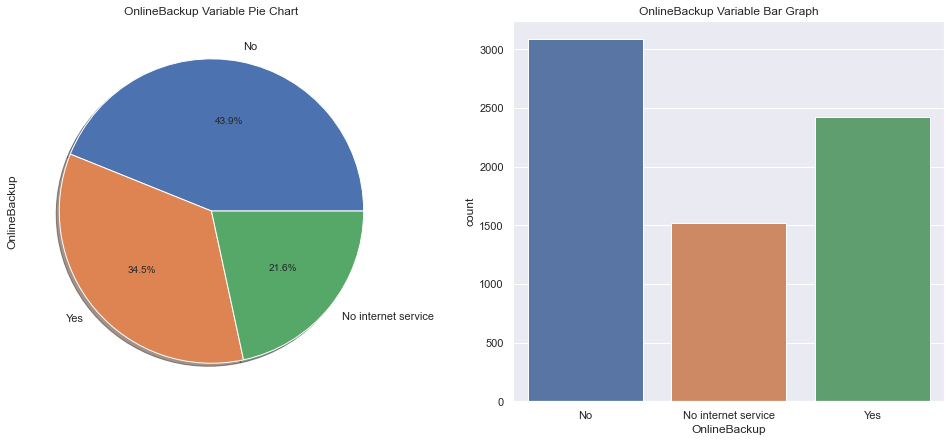

In [570]:
univariate_analysis_piechart_bargraph(df_with_labels, "OnlineBackup")

**Here we can see that 34.5% customer have online backup, 21.6% customer have No internet services and 43.9% customer have No online backup**

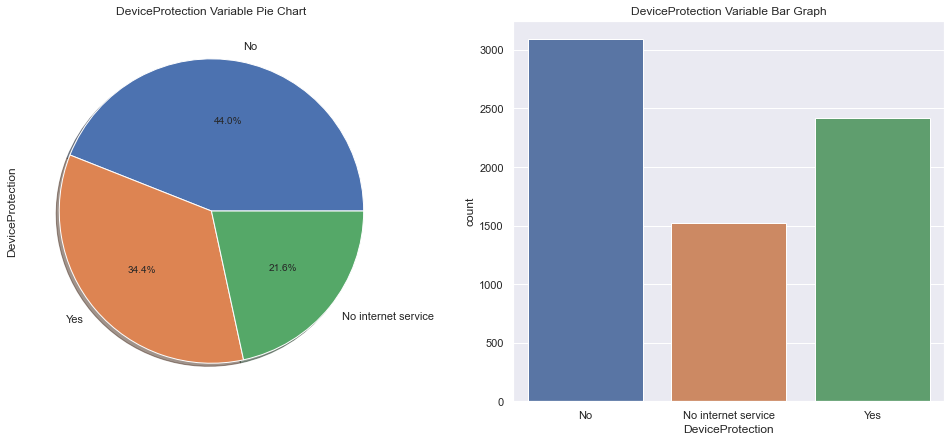

In [571]:
univariate_analysis_piechart_bargraph(df_with_labels, "DeviceProtection")

**Here we can see that 34.4% customer have Device protection, 44% customer have No Device protection and 21.6% customer have No internet service**

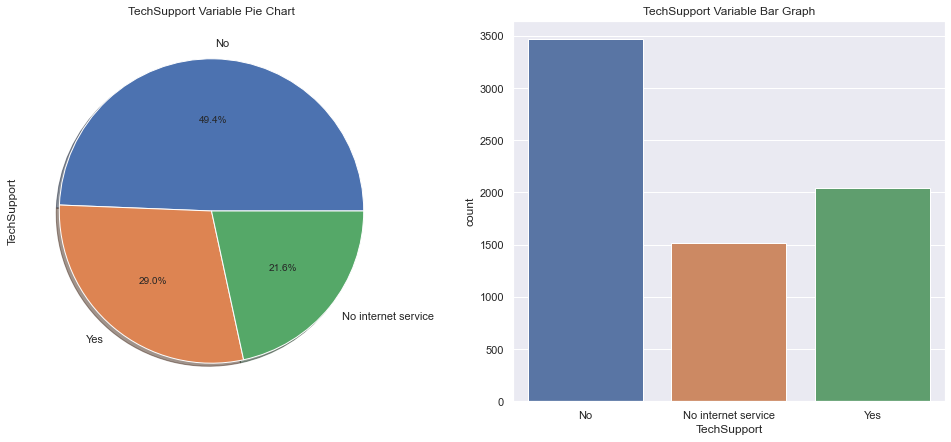

In [572]:
univariate_analysis_piechart_bargraph(df_with_labels, "TechSupport")

**Here we can see that 29% customer have tech support, 49.4% customer have No tech support and 21.6% customer have No internet service**

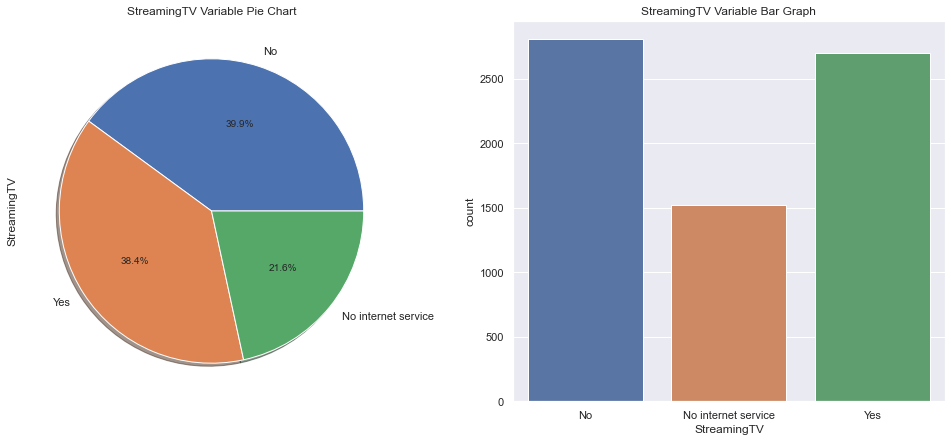

In [573]:
univariate_analysis_piechart_bargraph(df_with_labels, "StreamingTV")

**Here we can see that 38.4% customer have streaming tv, 39.9% customer have No streaming tv and 21.6% customer have No internet service**

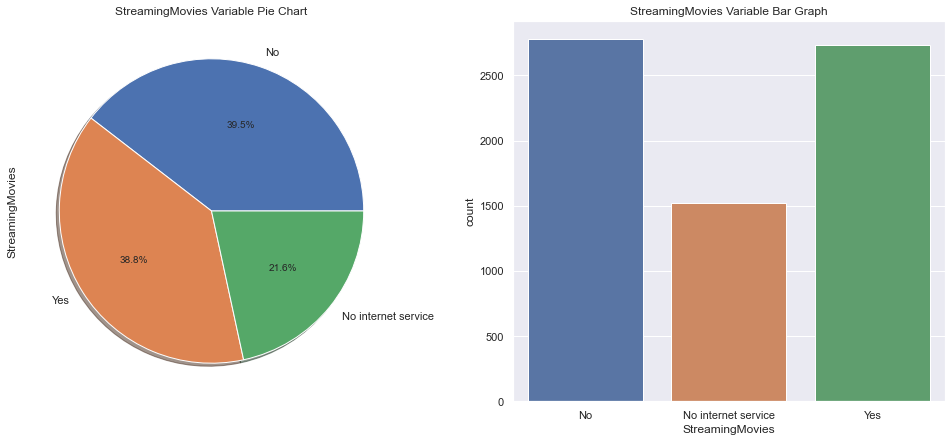

In [574]:
univariate_analysis_piechart_bargraph(df_with_labels, "StreamingMovies")

**Here we can see that 38.8% customer have streaming movies, 39.5% customer have No streaming movies and 21.6% customer have No internet service**

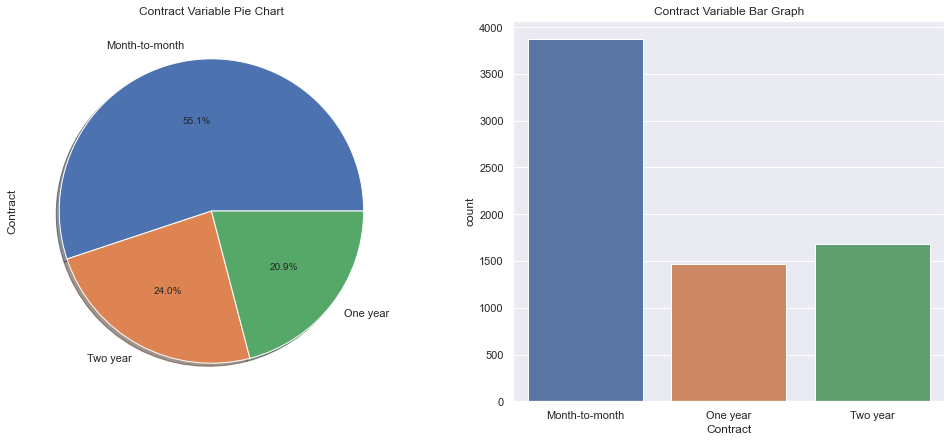

In [575]:
univariate_analysis_piechart_bargraph(df_with_labels, "Contract")

**20.9% customer have one year contract, 24% customer have 2 year contract and 55.1% customer have monthly**

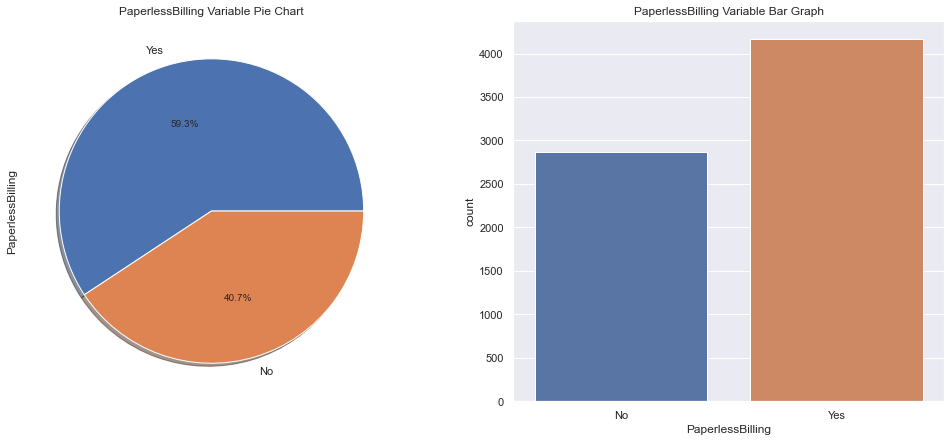

In [576]:
univariate_analysis_piechart_bargraph(df_with_labels, "PaperlessBilling")

**59.3 % people have paperless billing**

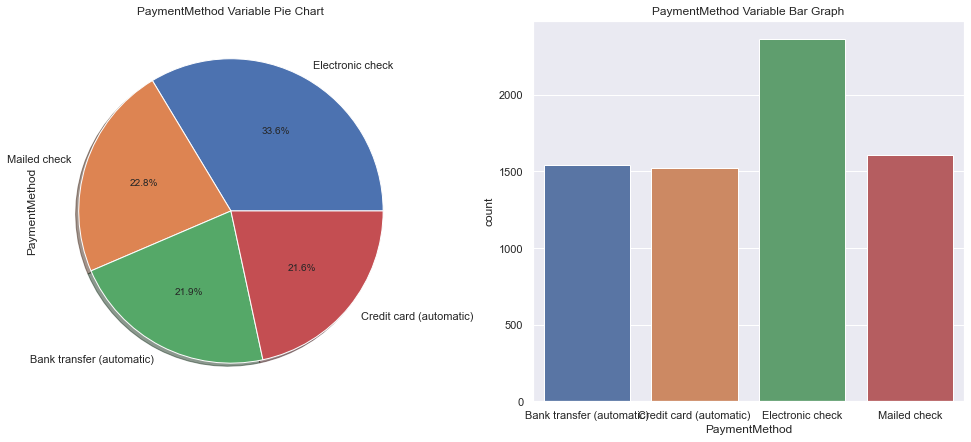

In [577]:
univariate_analysis_piechart_bargraph(df_with_labels, "PaymentMethod")

**We have customer paying with electronic check are highest in number. While Bank transfer, mailed check and credit card have almost equal distribution**

### Continuous Data univariate analysis

In [578]:
def univariate_analysis_boxplot_distplot(dataset, criteria):
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = criteria, data=dataset,  orient='h' , ax=axes[1])
    sns.distplot(dataset[criteria],  ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(dataset[criteria],25),np.percentile(dataset[criteria],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dataset[criteria] if i < lower or i > upper]
    
    print(f'Total Number of outliers in {criteria}: {len(Outliers)}')

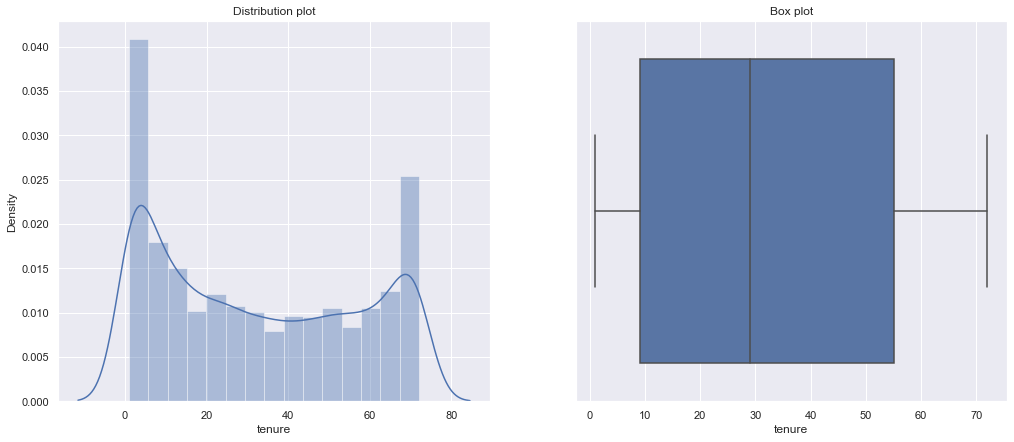

Total Number of outliers in tenure: 0


In [579]:
univariate_analysis_boxplot_distplot(df_with_labels, "tenure")

**After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.**

**Here the data have two humps and distribution is not normal. We dont see any outliers here.**



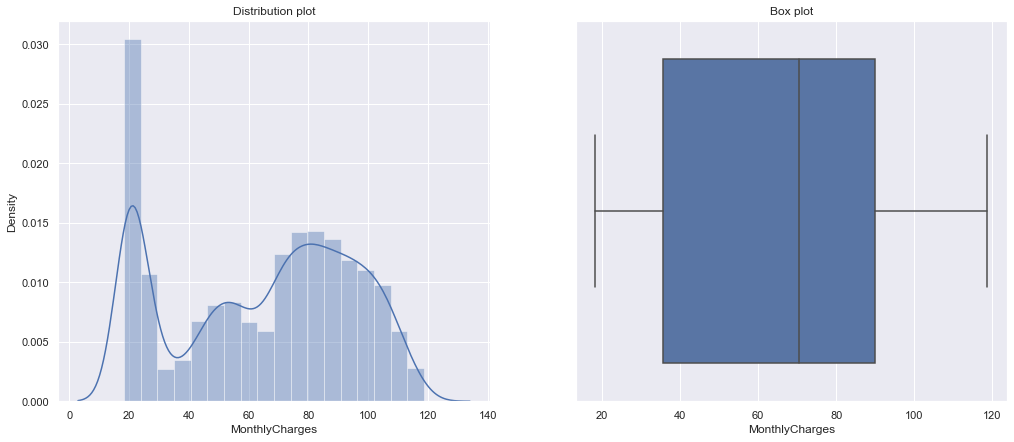

Total Number of outliers in MonthlyCharges: 0


In [580]:
univariate_analysis_boxplot_distplot(df_with_labels, "MonthlyCharges")

**Distribution is not normal. We dont see any outliers here.**

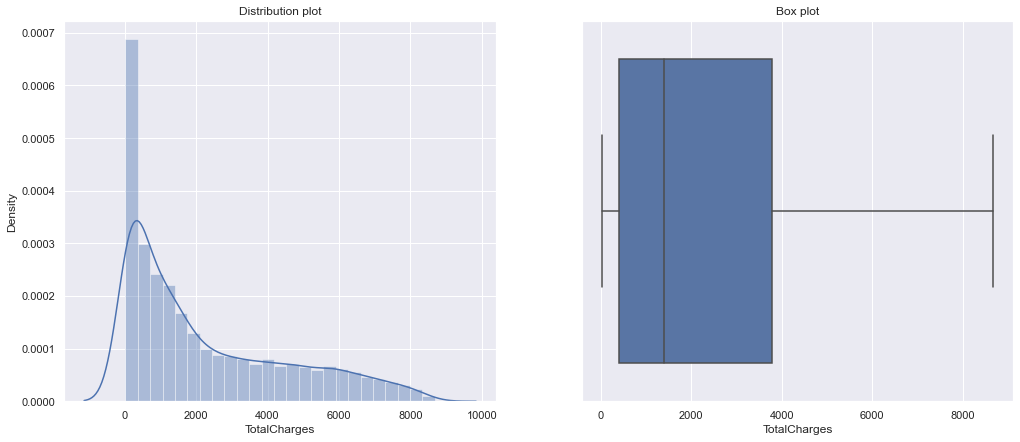

Total Number of outliers in TotalCharges: 0


In [581]:
univariate_analysis_boxplot_distplot(df_with_labels, "TotalCharges")

**Distribution seems normal with huge positive skewness is present. We dont see any outliers here.**

### Bi Variate Analysis

In [582]:
def bivariate_boxplot_bargraph(data,criteria, criteria2):
    f,axes=plt.subplots(1,2,figsize=(17,7))
    sns.boxplot(x=criteria, y=criteria2, data= data, ax=axes[0])
    sns.barplot(x=criteria, y=criteria2, data= data, ax=axes[1])
    axes[0].set_title(f'{criteria} Variable Pie Chart with hue {criteria2}')
    axes[1].set_title(f'{criteria} Variable Bar Graph  with hue {criteria2}')
    plt.show()

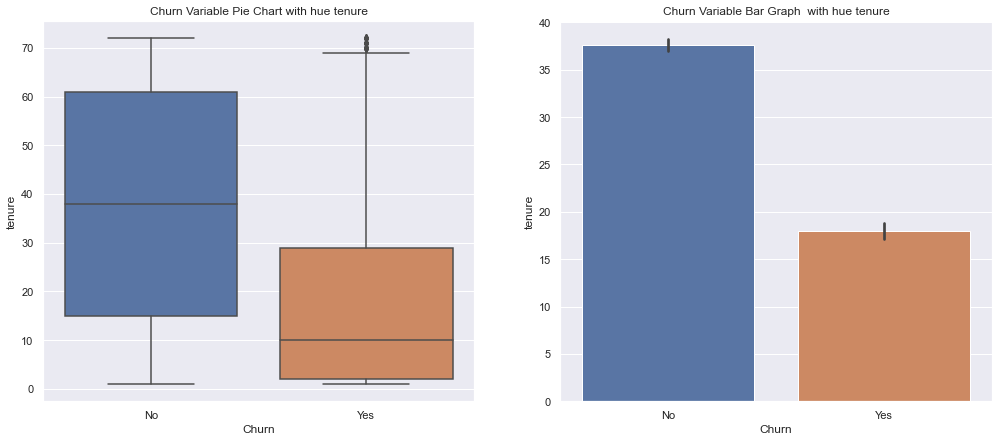

In [583]:
bivariate_boxplot_bargraph(df_with_labels, "Churn", "tenure")

**New customers are more likely to churn. Here we have few outliers for churn Yes.Hence we can say that few older customers are also leaving**

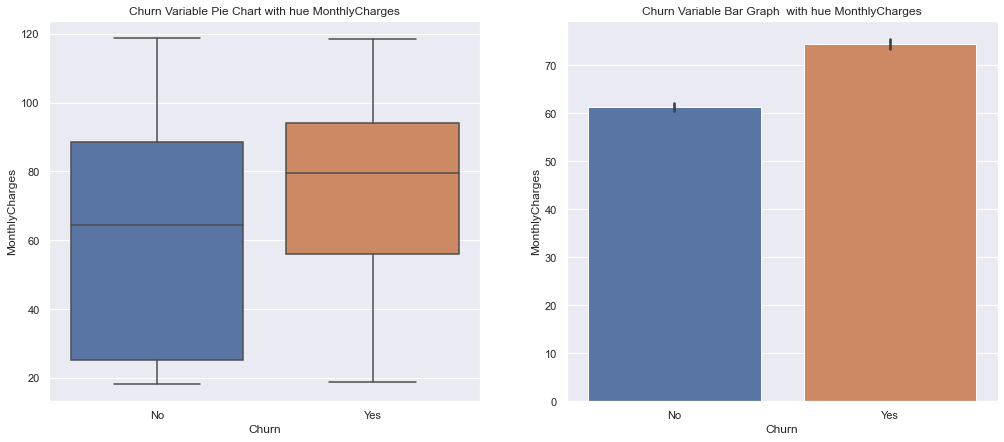

In [584]:
bivariate_boxplot_bargraph(df_with_labels, "Churn", "MonthlyCharges")

**Customers with higher Monthly Charges are also more likely to churn**

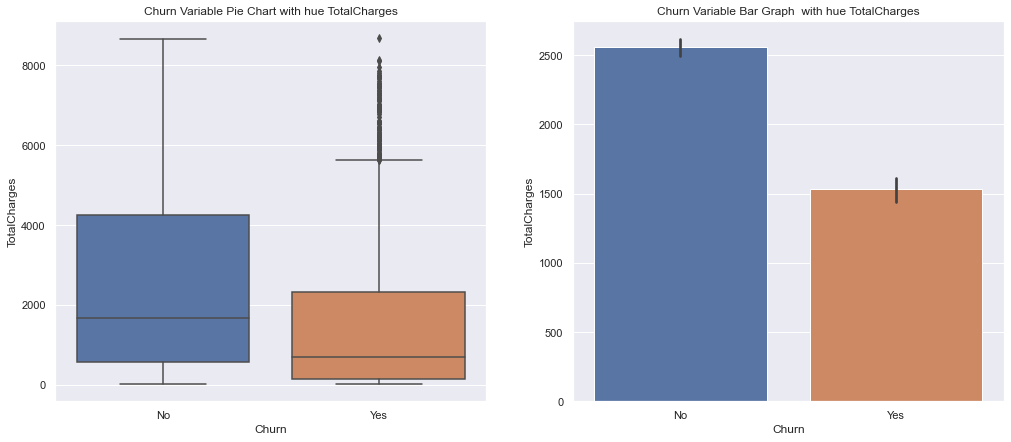

In [585]:
bivariate_boxplot_bargraph(df_with_labels, "Churn", "TotalCharges")

**Customers with low total charges are churning more. We have few outliers for churn yes category.**

### Numerical Data Pairplot

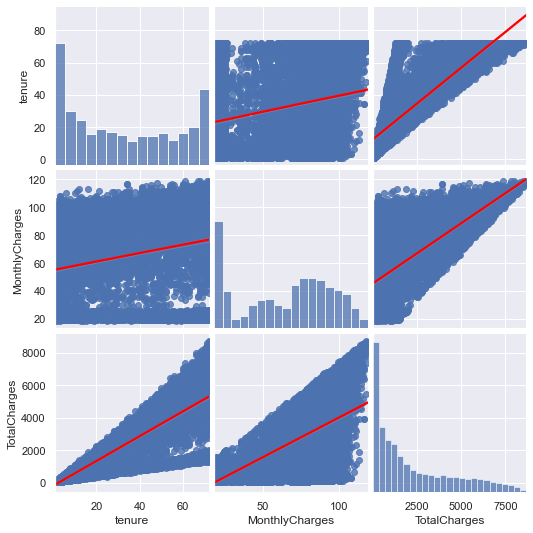

In [586]:
sns.pairplot(df_with_labels,kind="reg", plot_kws={'line_kws':{'color':'red'}})

**There is some linearity between Tenure and total charges. But its non-related data as tenure and monthly charges are different attributes.Its coincidental**

<AxesSubplot:>

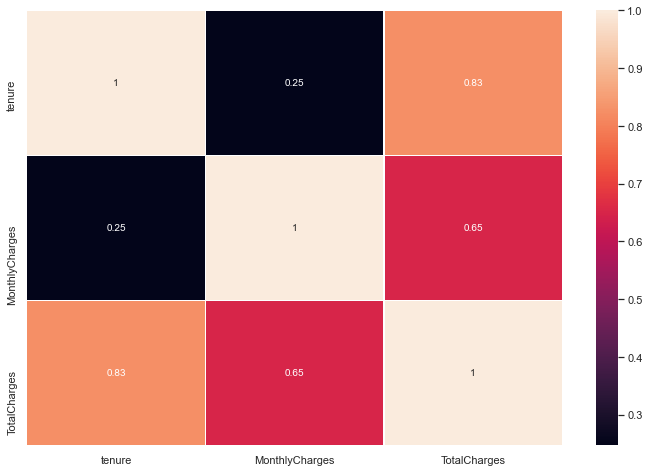

In [587]:
corr=df_with_labels.corr()
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

**There is some correlation between total charges and monthly charges.Tenure and total charges are correlated but they are different attributes.**

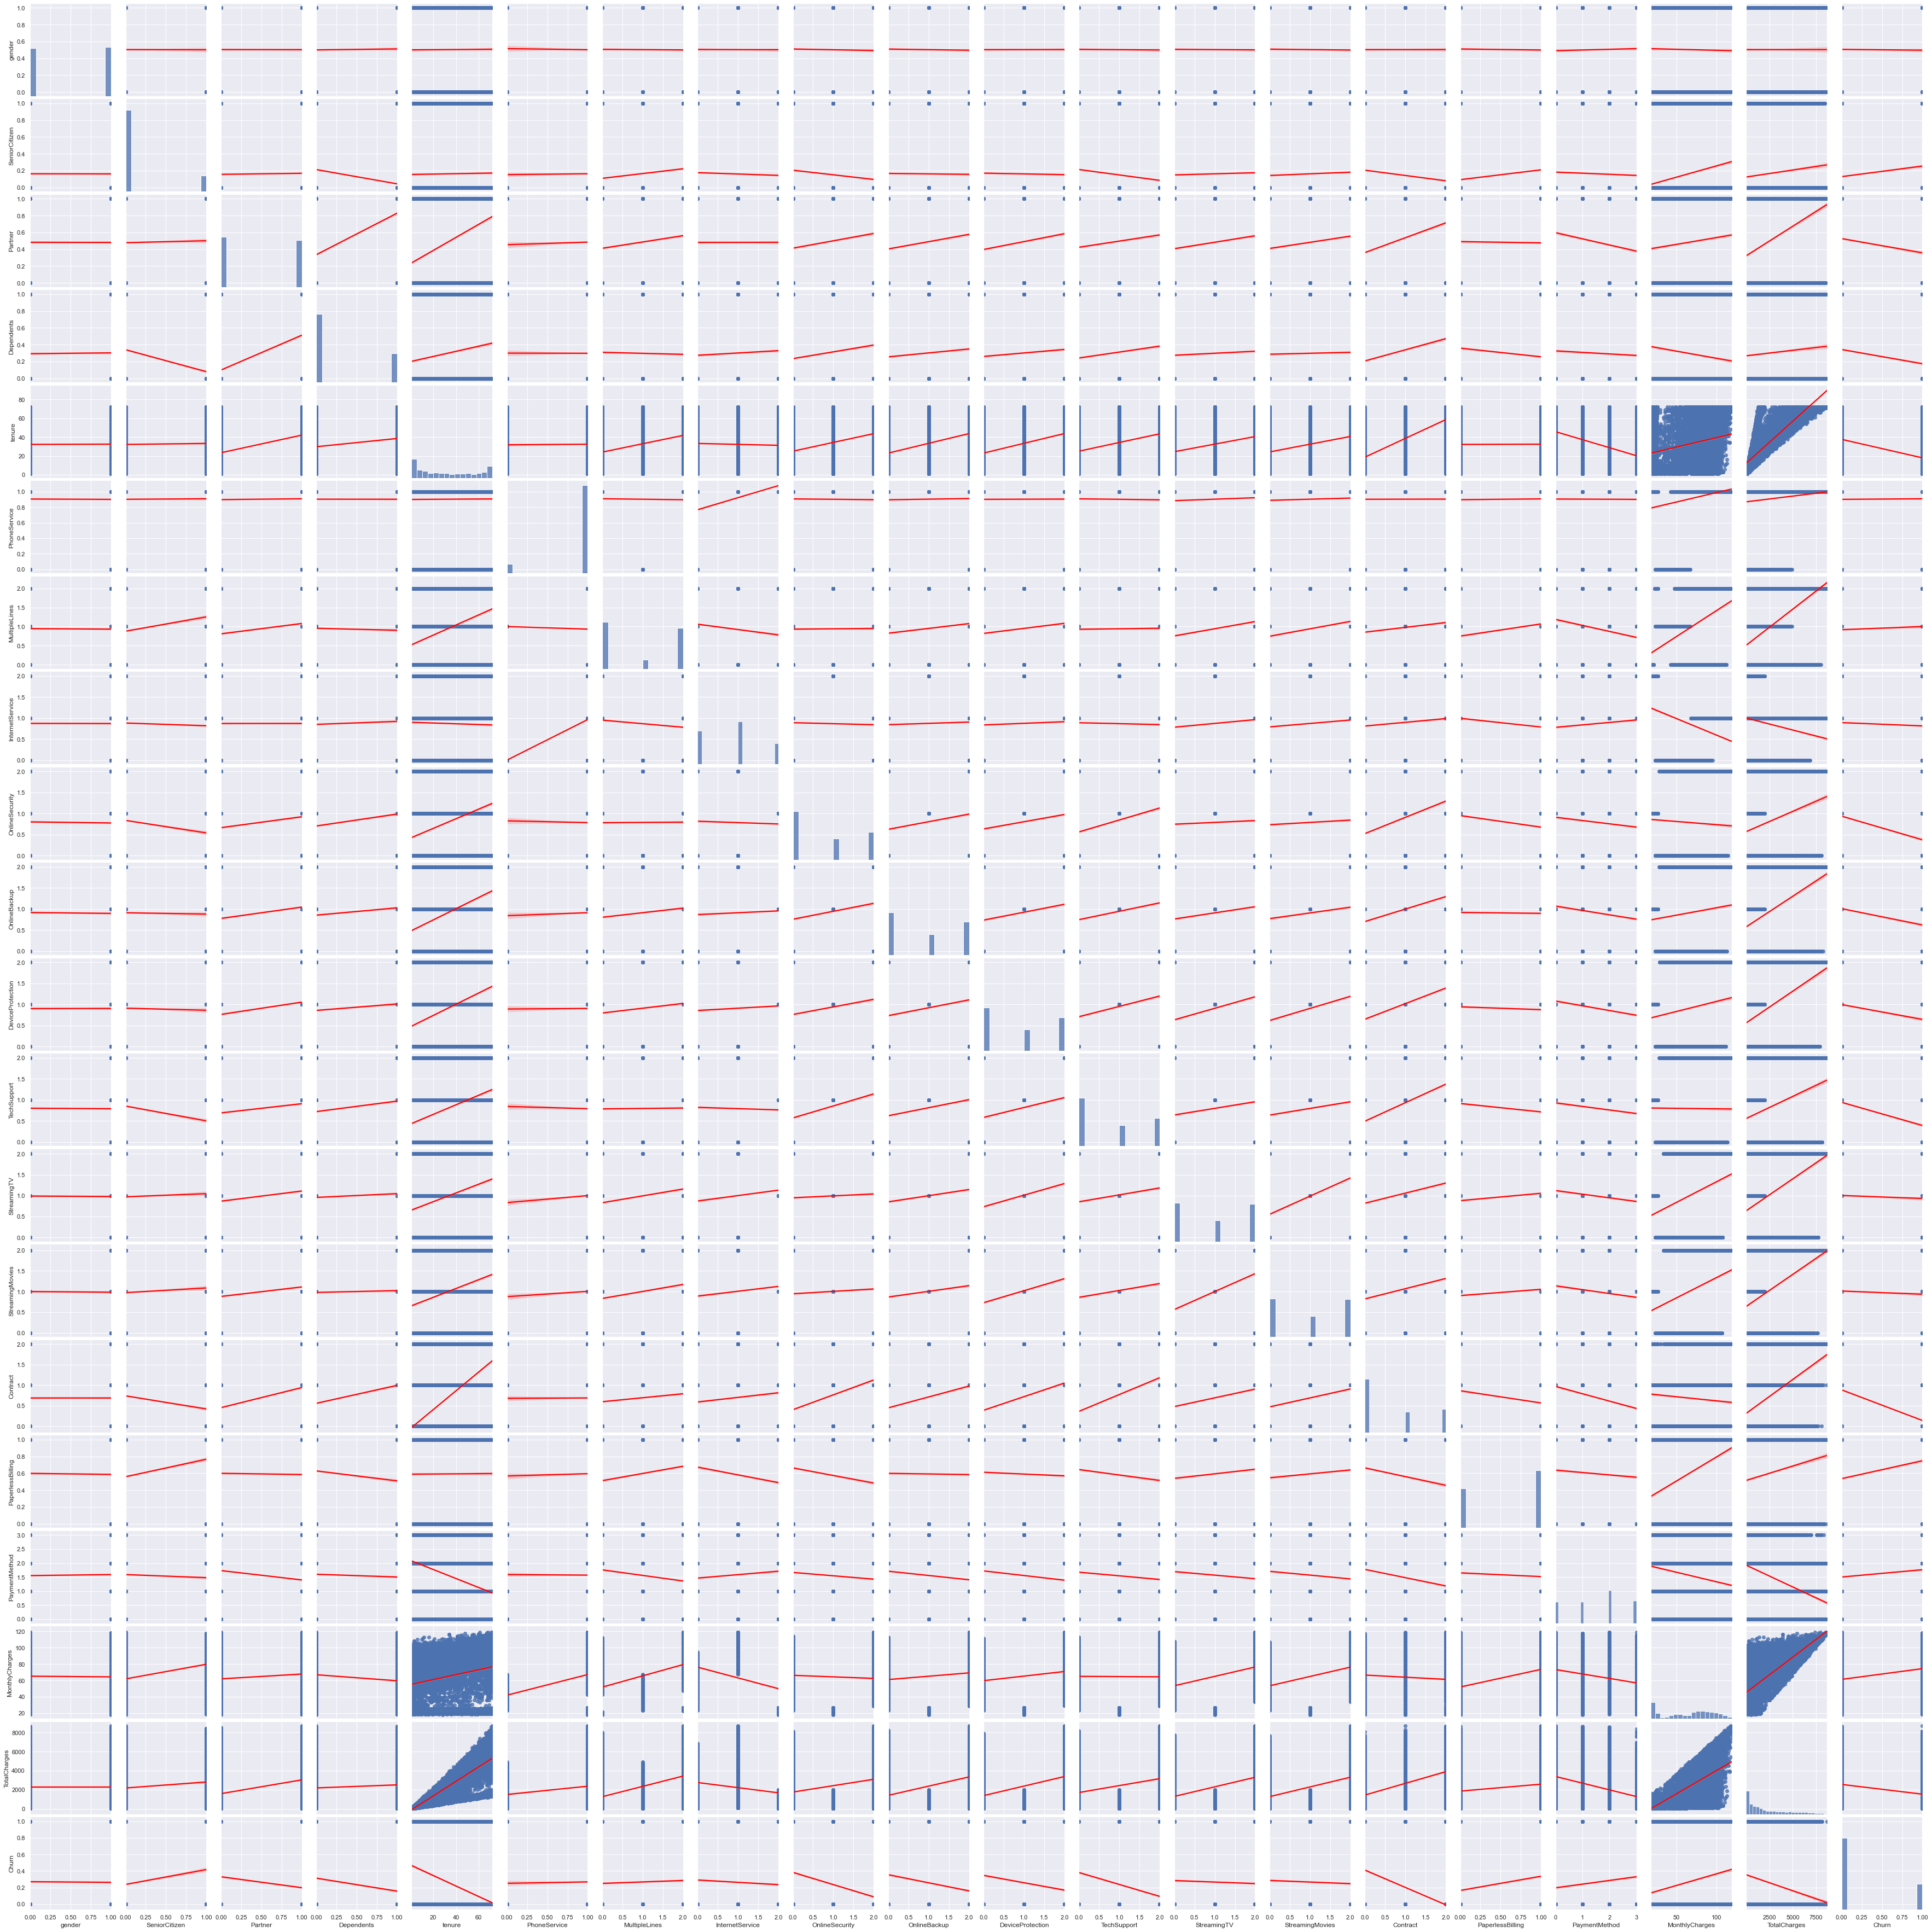

In [588]:
sns.pairplot(df,kind="reg", plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:>

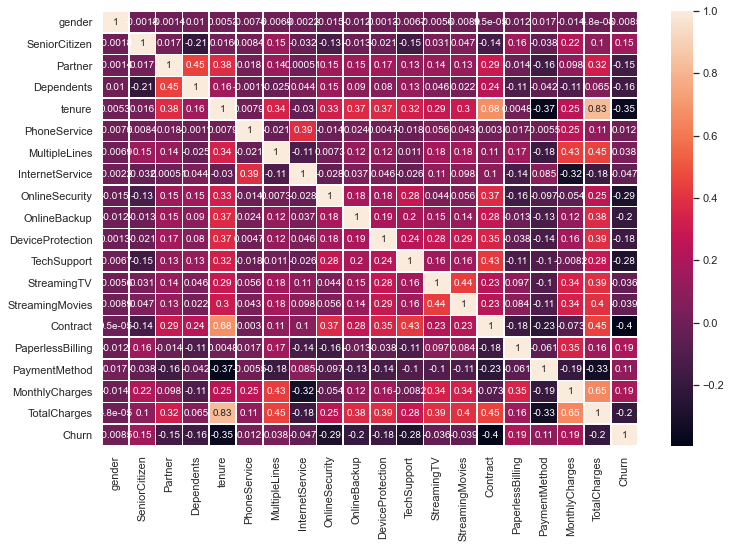

In [589]:
corr=df.corr()
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)

**As we can see in the heatmap there is some collinearity between tenure - total charges, contact -tenure, monthly charges and total charges**

### Multivariate Analysis

In [590]:
#Helper Function: draw_multivarient_plot(dataset, rows, cols, plot_type)

def draw_multivarient_plot(dataset, rows, cols, plot_type, y_var):
    
    assert plot_type in ['violin', "box", "point", "bar"],"We dont have such as plot type:{}".format(plot_type)
    column_names=categorical_columns
    
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
    
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=y_var, x=column_names[counter],hue='Churn',data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(y=y_var, x=column_names[counter],hue='Churn',data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=y_var,x=column_names[counter],hue='Churn',data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=y_var,x=column_names[counter],hue='Churn',data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

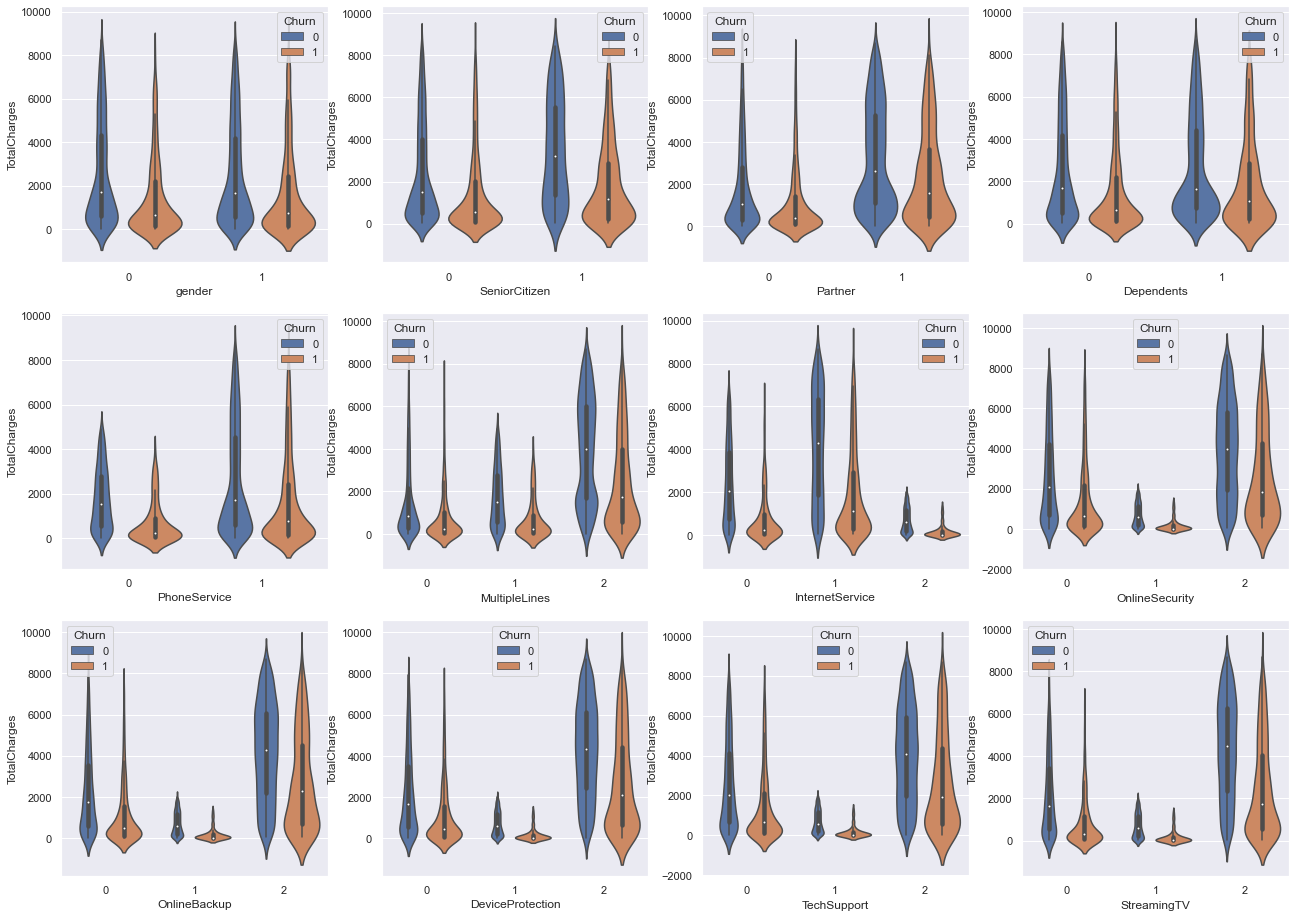

In [591]:
draw_multivarient_plot(dataset=df, rows=3, cols=4,plot_type="violin",y_var="TotalCharges")

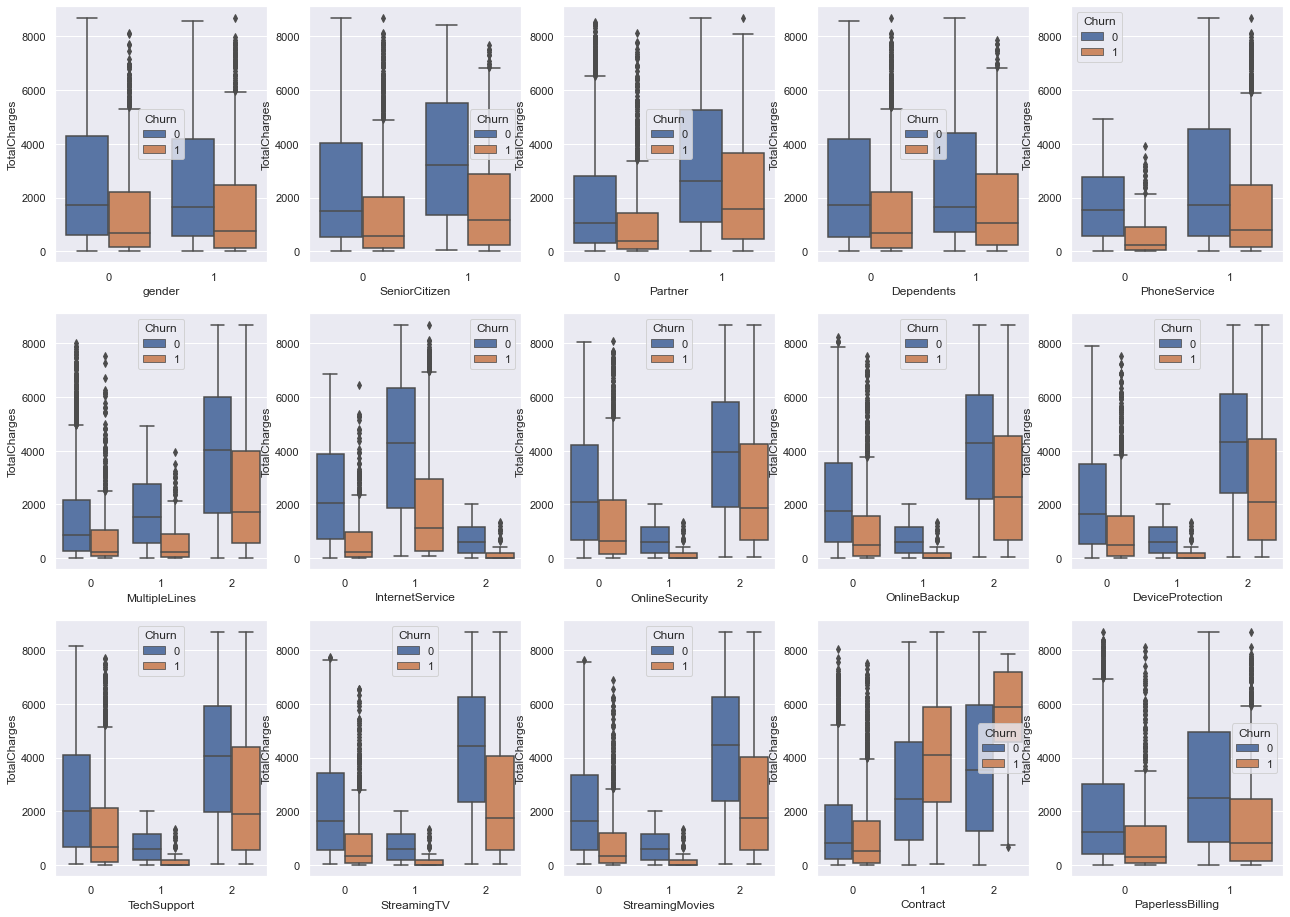

In [592]:
draw_multivarient_plot(dataset=df, rows=3, cols=5,plot_type="box",y_var="TotalCharges")

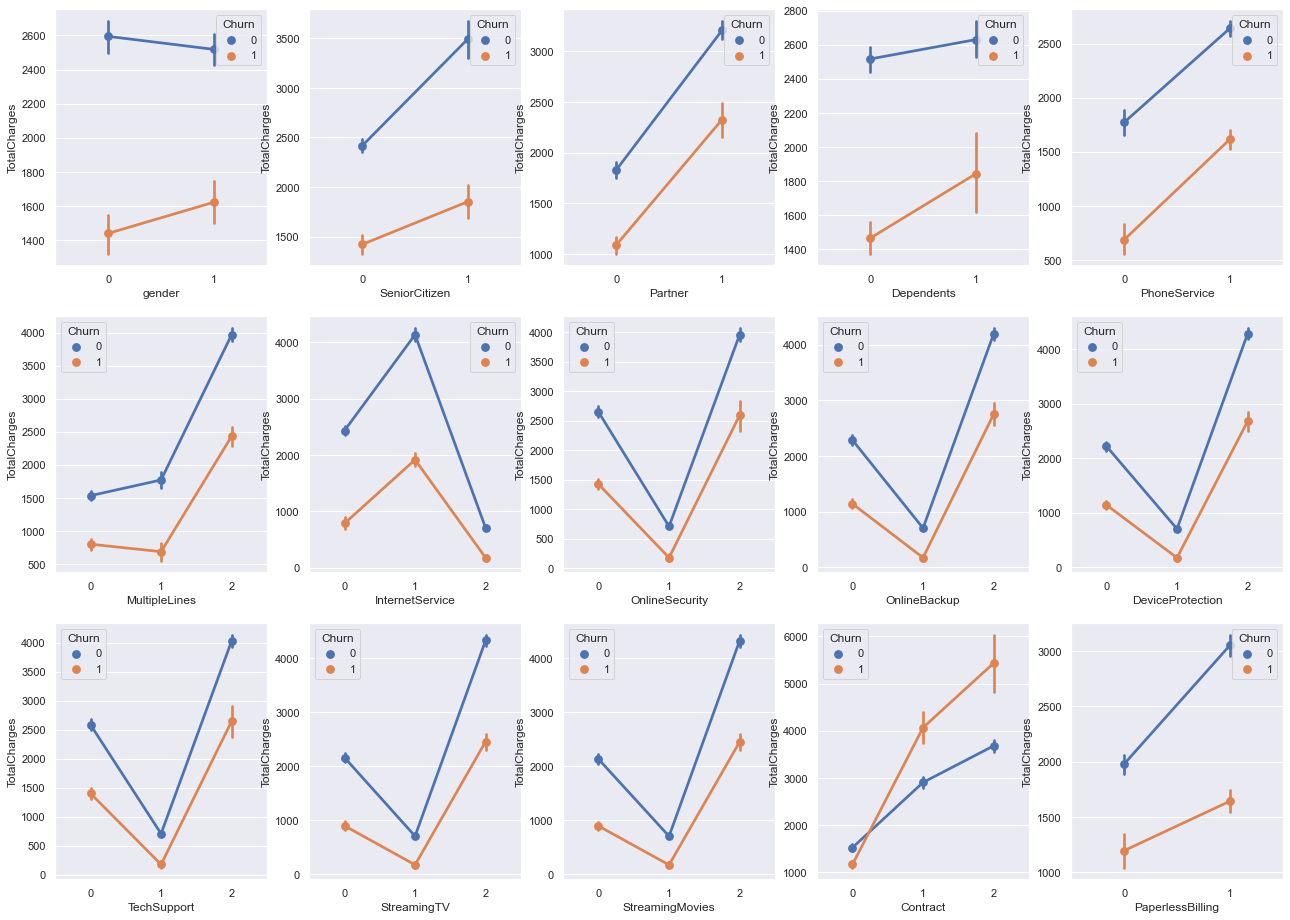

In [593]:
draw_multivarient_plot(dataset=df, rows=3, cols=5,plot_type="point",y_var="TotalCharges")

**Here we can see the disribution of totalCharges for different combinations of categorical values with churn as criteria.**

**This helps in understanding the distribution among different categorical values.**

**We can see there is noise for no-internet service in many category which is not good.And that particular category will be seen as noise by many of the model.This can be added in improvement section.**

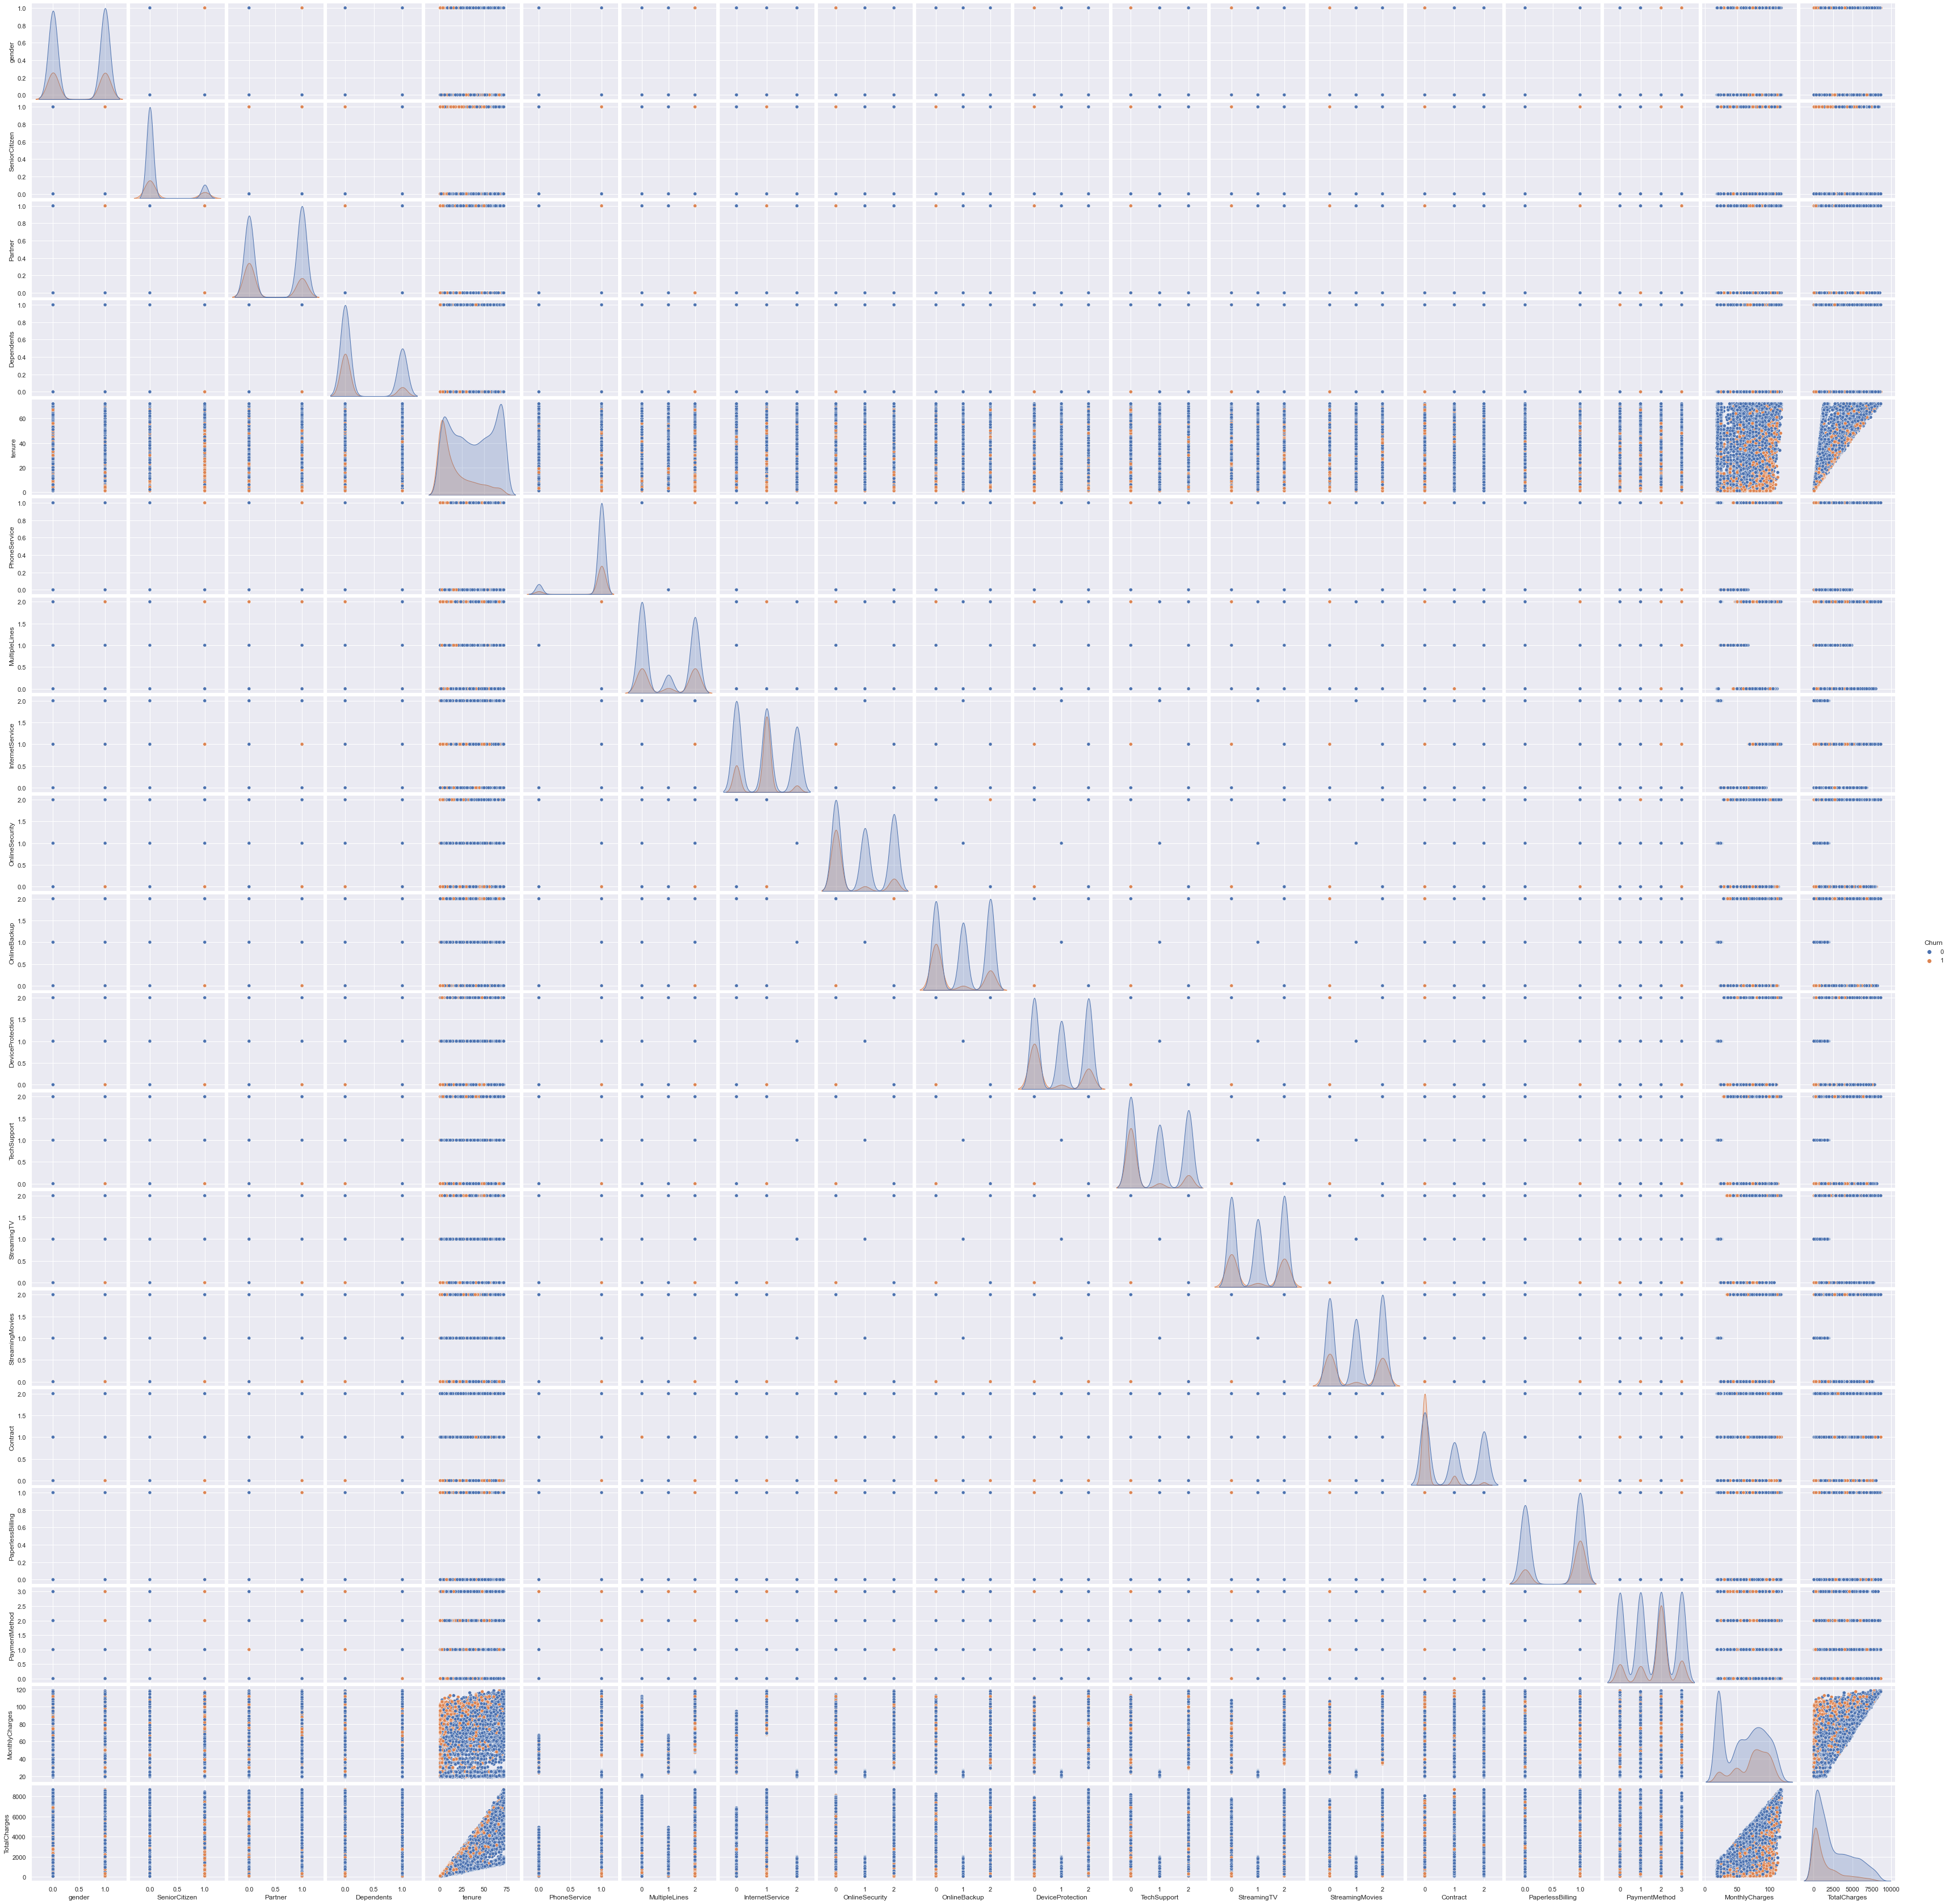

In [594]:
sns.pairplot(df, hue="Churn")

**Since there is not much correlation between the different columns we can skip the hypothesis testing**

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [600]:
for category in categorical_columns:
    df[category] = df[category].astype('category')

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

## 4. Data pre-processing: 

**• Segregate predictors vs target attributes**

**• Check for target balancing and fix it if found imbalanced.**

**• Perform train-test split.**

**• Check if the train and test data have similar statistical characteristics when compared with original data.**


**• Segregate predictors vs target attributes**

**1. x: features**

**2. y: target variables (normal,type_h,type_s)**

In [602]:
x,y = df.loc[:,df.columns != 'Churn'], df.loc[:,'Churn']

**Checking outliers**

In [603]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',c,len(Outliers)))

 Total Number of outliers in tenure : 0
 Total Number of outliers in MonthlyCharges : 0
 Total Number of outliers in TotalCharges : 0


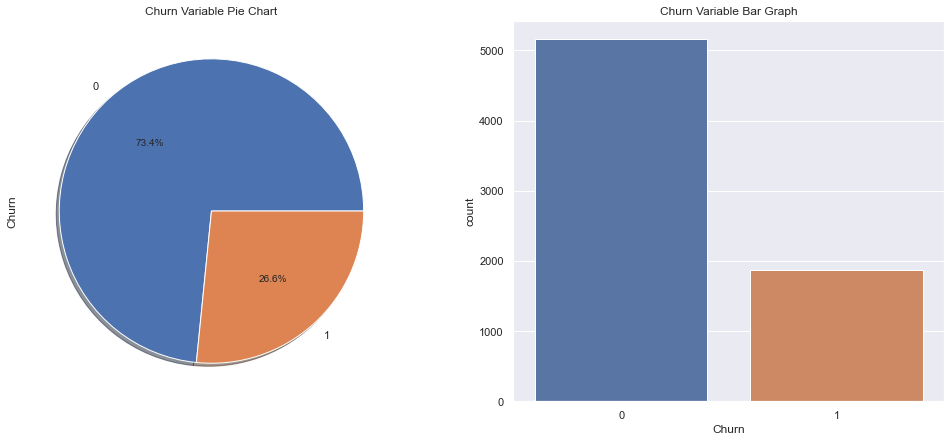

In [604]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Churn',data=df,ax=axes[1])
axes[0].set_title('Churn Variable Pie Chart')
axes[1].set_title('Churn Variable Bar Graph')
plt.show()

**We have 73.4% of churn no data and only 26.6% of churn yes data which makes it highly skewed data**

**This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.**

In [605]:
x,y = df.loc[:,df.columns != 'Churn'], df.loc[:,'Churn']
categorical_columns=[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
smote_nc=SMOTENC(categorical_features=categorical_columns,random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(x,y)

In [606]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0    5163
1    1869
Name: Churn, dtype: int64


In [607]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [608]:
x_s.isnull().sum().sum()

0

**• Perform train-test split.**

In [609]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_s, y_s, test_size=0.30, random_state=1)

In [610]:
x_train.head(3)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
1584      0             1       0          0      65            0   
1043      1             0       1          1      32            1   
1077      0             0       0          0      41            1   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
1584             1               0              0            2   
1043             0               1              0            0   
1077             2               1              2            2   

     DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
1584                2           0           2               2        2   
1043                0           0           0               0        0   
1077                2           2           2               2        0   

     PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  
1584                1             0           53.50       3517.90  
1043                1             0           69.75       2347.90  
1077                1             0          114.50       4527.45

In [611]:
x_train_res.head(3)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
9498      1             0       1          0      10            1   
4481      0             0       1          1      64            1   
3165      1             0       0          0      28            1   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
9498             0               1              0            0   
4481             2               0              0            2   
3165             2               1              0            2   

     DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
9498                0           0           2               0        0   
4481                0           0           0               0        1   
3165                0           0           2               2        1   

     PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  
9498                1             2       81.742157    860.210981  
4481                1             0       53.850000   3399.850000  
3165                0             2      100.200000   2688.450000

In [612]:
x_test.head(3)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
1778      1             0       1          1      72            1   
5036      0             1       1          0      16            1   
1106      0             0       0          0      63            1   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
1778             2               2              1            1   
5036             2               1              0            0   
1106             2               1              0            2   

     DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
1778                1           1           1               1        2   
5036                0           0           0               2        0   
1106                0           0           2               2        2   

     PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  
1778                0             1           24.75       1859.10  
5036                1             1           85.35       1375.15  
1106                0             0           97.45       6253.00

In [613]:
x_test_res.head(3)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
10280      0             0       0          0       3            1   
8160       1             0       0          0      22            1   
2976       1             0       0          0      67            1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
10280             0               0              0            0   
8160              2               1              0            0   
2976              0               2              1            1   

      DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
10280                0           0           0               0        0   
8160                 2           0           2               0        0   
2976                 1           1           1               1        2   

      PaperlessBilling PaymentMethod  MonthlyCharges  TotalCharges  
10280                1             3       57.662059    195.343033  
8160                 1             2       90.517565   1916.326175  
2976                 0             0       20.500000   1430.950000

## 5. Model training, testing and tuning:

**• Train and test all ensemble models taught in the learning module.**

    • Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers. 

**• Display the classification accuracies for train and test data.**

**• Apply all the possible tuning techniques to train the best model for the given data.**

    • Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

**• Display and compare all the models designed with their train and test accuracies.**

**• Select the final best trained model along with your detailed comments for selecting this model.**

**• Pickle the selected model for future use.**

In [614]:
model_accuracy=[]
model_performance = pd.DataFrame(columns=[
    'Accuracy','R Squared', 'MSE', 
    'MSLE', 'CV mean', 'CV standard deviation', 
    'Precision', 'Recall','f1'])
names=[]
def fitAndAnalyseModel(model,model_type,x_train,y_train,x_test,y_test):
    ############################################################################################
    # Design and train
    ############################################################################################

    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print('Prediction: {}'.format(prediction))

    ############################################################################################
    # Display the classification accuracies for train and test data.
    ############################################################################################

    print(f'With {model_type} accuracy of train data is: ',model.score(x_train,y_train)) # accuracy
    print(f'With {model_type} accuracy of test data is: ',model.score(x_test,y_test)) # accuracy


    ############################################################################################
    #Display and explain the classification report in detail.
    ############################################################################################

    # Confusion Matrix
    cm = confusion_matrix(y_test, prediction, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["non churn","churn"]],
                      columns = [i for i in ["non churn","churn"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.show()

    # Classification Report
    print('\n{}'.format(classification_report(y_test, prediction)))
    
    
    ############################################################################################
    #Cross validation testing
    ############################################################################################
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_s, y_s, cv=kfold, scoring='accuracy')
    model_accuracy.append(cv_results)
    names.append(model_type)
    msg = "{} accuracy mean and standard deviation for crossvalidation: {} ({})".format(model_type, cv_results.mean(), cv_results.std())
    print(msg)
    
    r2 = metrics.r2_score(y_test, prediction)  
    rmse = sqrt(metrics.mean_squared_error(y_test, prediction))   
    rmsle = sqrt(metrics.mean_squared_log_error(y_test, prediction))
    cv_mean = cv_results.mean()
    cv_std = cv_results.std()
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    
    global model_performance
    row=pd.Series({'Accuracy': accuracy, 'R Squared': r2, 'MSE': rmse,
                   'MSLE': rmsle, 'CV mean': cv_mean, 'CV standard deviation': cv_std,
                   'Precision': precision, 'Recall': recall, 'f1': f1},name=model_type)
    model_performance = model_performance.append(row)
    print(row)

In [615]:
model_dict={}
def modelAnalysis(model_type,x_train,y_train,x_test,y_test,depth=0):
    # Fit the model on train
    if model_type=='DecisionTreeClassifier':
        if depth !=0:
            model = DecisionTreeClassifier(criterion = 'gini',max_depth = depth, random_state=1)
        else:
            model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
        
    elif model_type=='BaggingClassifier':
        model = BaggingClassifier(n_estimators=50,random_state=1)
    elif model_type=='AdaBoostClassifier':
        model = AdaBoostClassifier(n_estimators=10, random_state=1)
    elif model_type=='GradientBoostingClassifier':
        model = GradientBoostingClassifier(n_estimators = 50, random_state=1)
    elif model_type=='RandomForestClassifier':
        model = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
    elif model_type=='knn':
        model = KNeighborsClassifier(n_neighbors=3)

    fitAndAnalyseModel(model,model_type,x_train,y_train,x_test,y_test)
    model_dict[model_type] = model
    return model


Prediction: [0 1 0 ... 0 1 0]
With DecisionTreeClassifier accuracy of train data is:  0.9979683055668428
With DecisionTreeClassifier accuracy of test data is:  0.7184834123222749


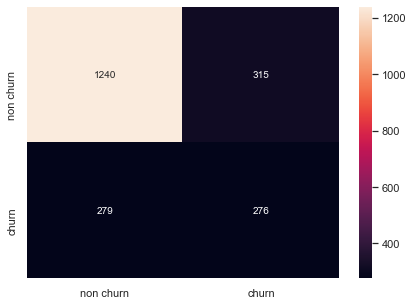


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.47      0.50      0.48       555

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.72      0.72      2110

DecisionTreeClassifier accuracy mean and standard deviation for crossvalidation: 0.7853226284547904 (0.06943005903515714)
Accuracy                 0.718483
R Squared               -0.452264
MSE                      0.530581
MSLE                     0.367771
CV mean                  0.785323
CV standard deviation    0.069430
Precision                0.467005
Recall                   0.497297
f1                       0.481675
Name: DecisionTreeClassifier, dtype: float64


In [616]:
decisionTree=modelAnalysis("DecisionTreeClassifier",x_train,y_train,x_test,y_test)

## Decision Tree Analysis

**Train data Accuracy is very high but Test data accury is low, this is due to the overfitting of training data. We can restrict the depth of tree for avoid overfitting**

**We can see that precision and recall for churn=1 here are very bad 0.47 and 0.5. We are interested in predicting churn yes, hence the model is not good at all.**

**weighted recall, f1 and precision are better due to high values for churn=0. While macro avg helps in pointing out that the low scores are due to lower values for churn =1**

**Hence, we need to use sampled data.**

Prediction: [1 1 0 ... 0 0 0]
With DecisionTreeClassifier accuracy of train data is:  0.9987548422800221
With DecisionTreeClassifier accuracy of test data is:  0.7730794060684313


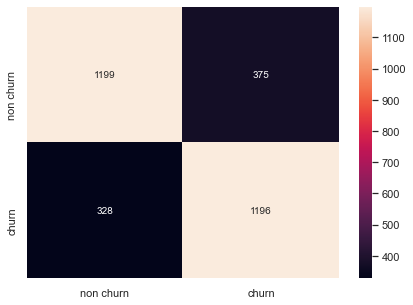


              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1574
           1       0.76      0.78      0.77      1524

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

DecisionTreeClassifier accuracy mean and standard deviation for crossvalidation: 0.7853226284547904 (0.06943005903515714)
Accuracy                 0.773079
R Squared                0.092081
MSE                      0.476362
MSLE                     0.330189
CV mean                  0.785323
CV standard deviation    0.069430
Precision                0.761299
Recall                   0.784777
f1                       0.772859
Name: DecisionTreeClassifier, dtype: float64


In [617]:
decisionTreeWithSampling=modelAnalysis("DecisionTreeClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## Decision Tree with sampled data Analysis

**Here we cans see that there is increase in test data accuracy which is good. Next we can restrict the depth of tree for avoid overfitting**

**Here we can see that there is increase in recall precision and f1 score after sampling for churn =1 . We are interested in predicting churn yes, hence the model is better than unsampled data.**

**We can see the balanced macro and weighted avg here. This values is better than un-sampled data**

**Next we will try to remove the overfitting of training data by restricting the depth of the tree**

#### NOTE: from here onward we will be using sampled data only. As the unsampled data is given biased error and low recall values for the churn =1, which is bad as we are trying to analyse churn=1 data here to prevent customer from leaving

Prediction: [1 1 0 ... 0 1 0]
With DecisionTreeClassifier accuracy of train data is:  0.7985611510791367
With DecisionTreeClassifier accuracy of test data is:  0.7911555842479019


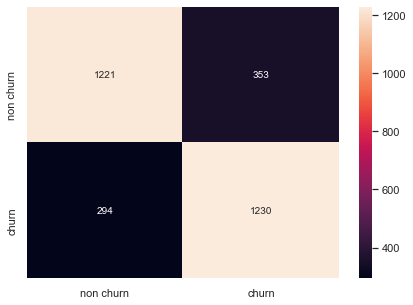


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1574
           1       0.78      0.81      0.79      1524

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

DecisionTreeClassifier accuracy mean and standard deviation for crossvalidation: 0.7872506697584367 (0.04413935094881992)
Accuracy                 0.791156
R Squared                0.164405
MSE                      0.456995
MSLE                     0.316765
CV mean                  0.787251
CV standard deviation    0.044139
Precision                0.777006
Recall                   0.807087
f1                       0.791761
Name: DecisionTreeClassifier, dtype: float64


In [618]:
decisionTreeDepthRestriction=modelAnalysis("DecisionTreeClassifier",x_train_res,y_train_res,x_test_res,y_test_res,depth=4)

## Decision Tree with sampled data and restricted depth Analysis

**Here we cans see that there is increase in test data accuracy which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**


In [619]:
##HAVE COMMENTED VISUALISATION AS ITS TAKING HIGH TIME FOR EXECUTION
# fn = list(x_train)
# cn = ['No', 'Yes']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
# plot_tree(decisionTree, feature_names = fn, class_names=cn, filled = True)

# fig.savefig('tree.png')

In [620]:
print (pd.DataFrame(decisionTree.feature_importances_, columns = ["Imp"], index = x_train_res.columns))

                       Imp
gender            0.029617
SeniorCitizen     0.025020
Partner           0.023184
Dependents        0.018878
tenure            0.102066
PhoneService      0.000783
MultipleLines     0.016664
InternetService   0.005841
OnlineSecurity    0.042662
OnlineBackup      0.013143
DeviceProtection  0.015480
TechSupport       0.018496
StreamingTV       0.010312
StreamingMovies   0.009277
Contract          0.170659
PaperlessBilling  0.023042
PaymentMethod     0.041212
MonthlyCharges    0.217107
TotalCharges      0.216559


**Here we can see that the columns like MonthlyCharges, TotalCharges and Contract have very high importance score.**

Prediction: [1 1 0 ... 0 0 0]
With BaggingClassifier accuracy of train data is:  0.9982014388489209
With BaggingClassifier accuracy of test data is:  0.8298902517753389


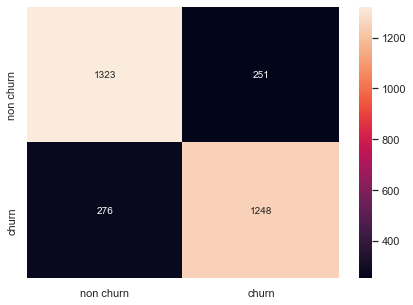


              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1574
           1       0.83      0.82      0.83      1524

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

BaggingClassifier accuracy mean and standard deviation for crossvalidation: 0.8381050338818973 (0.07495577349461499)
Accuracy                 0.829890
R Squared                0.319384
MSE                      0.412444
MSLE                     0.285884
CV mean                  0.838105
CV standard deviation    0.074956
Precision                0.832555
Recall                   0.818898
f1                       0.825670
Name: BaggingClassifier, dtype: float64


In [621]:
baggingClassifier=modelAnalysis("BaggingClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## Bagging Classifier Analysis

**Here we can see that there is increase in test data accuracy to 83% which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

**All the cores are better than previous models analysed till now.**

Prediction: [1 1 0 ... 0 1 0]
With AdaBoostClassifier accuracy of train data is:  0.7970392916436082
With AdaBoostClassifier accuracy of test data is:  0.8034215622982569


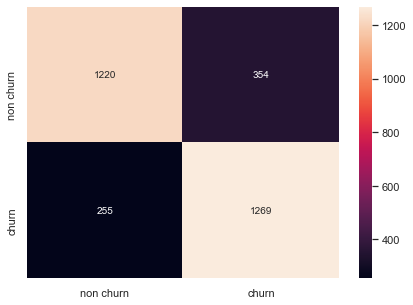


              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1574
           1       0.78      0.83      0.81      1524

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098

AdaBoostClassifier accuracy mean and standard deviation for crossvalidation: 0.7964482166040058 (0.034782802296048215)
Accuracy                 0.803422
R Squared                0.213481
MSE                      0.443372
MSLE                     0.307322
CV mean                  0.796448
CV standard deviation    0.034783
Precision                0.781885
Recall                   0.832677
f1                       0.806482
Name: AdaBoostClassifier, dtype: float64


In [622]:
adaBoostClassifier=modelAnalysis("AdaBoostClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## AdaBoostClassifier Analysis

**Here we can see that there is slight decrease in test data accuracy to 80.34%**

**Here we can see that there is decrease in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**



Prediction: [1 1 0 ... 0 0 0]
With GradientBoostingClassifier accuracy of train data is:  0.8306585500830105
With GradientBoostingClassifier accuracy of test data is:  0.8224661071659135


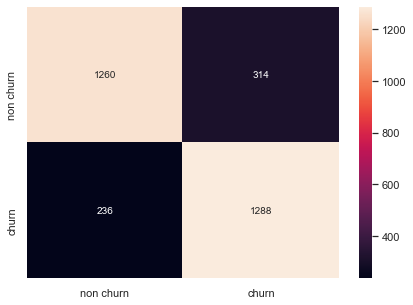


              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1574
           1       0.80      0.85      0.82      1524

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098

GradientBoostingClassifier accuracy mean and standard deviation for crossvalidation: 0.8184355230869673 (0.04215729618288868)
Accuracy                 0.822466
R Squared                0.289679
MSE                      0.421348
MSLE                     0.292056
CV mean                  0.818436
CV standard deviation    0.042157
Precision                0.803995
Recall                   0.845144
f1                       0.824056
Name: GradientBoostingClassifier, dtype: float64


In [623]:
gradientBoostingClassifier=modelAnalysis("GradientBoostingClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## GradientBoostingClassifier Analysis

**Here we can see that test data accuracy to 82.24% is better than AdaBoostClassifier but lesser Bagging Classifier**

**The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

Prediction: [1 1 0 ... 0 0 0]
With RandomForestClassifier accuracy of train data is:  0.9979247371333703
With RandomForestClassifier accuracy of test data is:  0.8405422853453841


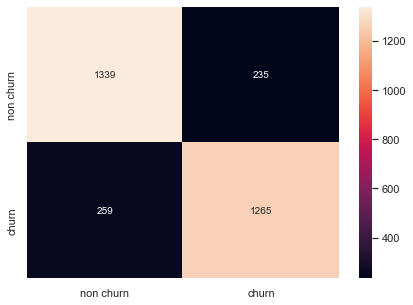


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1574
           1       0.84      0.83      0.84      1524

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

RandomForestClassifier accuracy mean and standard deviation for crossvalidation: 0.8390729942892307 (0.07281403634145256)
Accuracy                 0.840542
R Squared                0.362003
MSE                      0.399322
MSLE                     0.276789
CV mean                  0.839073
CV standard deviation    0.072814
Precision                0.843333
Recall                   0.830052
f1                       0.836640
Name: RandomForestClassifier, dtype: float64


In [624]:
randomForestClassifier=modelAnalysis("RandomForestClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## RandomForestClassifier Analysis

**Here we can see that there is increase in test data accuracy to 84.05% which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

**All the cores are better than previous models analysed till now.**

### Design your own ensemble technique using weak classifiers.

**Above we have already done the Homogeneous ensemble models analysis**

**Will be using stacking and voting for few of above classifiers like knn, random forest and gradientBoostingClassifiers**

Prediction: [1 1 0 ... 0 0 0]
With knn accuracy of train data is:  0.8749308245711124
With knn accuracy of test data is:  0.7591994835377663


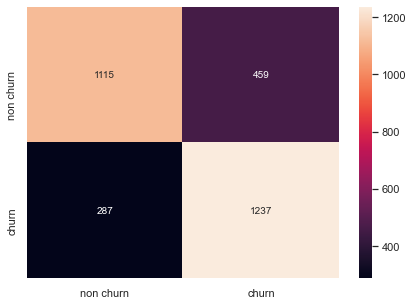


              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1574
           1       0.73      0.81      0.77      1524

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098

knn accuracy mean and standard deviation for crossvalidation: 0.7801702724809954 (0.014424016300767537)
Accuracy                 0.759199
R Squared                0.036547
MSE                      0.490714
MSLE                     0.340137
CV mean                  0.780170
CV standard deviation    0.014424
Precision                0.729363
Recall                   0.811680
f1                       0.768323
Name: knn, dtype: float64


In [625]:
knn = modelAnalysis("knn",x_train_res,y_train_res,x_test_res,y_test_res)

In [626]:
VotingClassifier=VotingClassifier(
    estimators= [
        ('KNN', knn), 
        ('Random Forest', randomForestClassifier),
        ('Gradient Boost',gradientBoostingClassifier),
    ], voting='hard'
)


Prediction: [1 1 0 ... 0 0 0]
With VotingClassifier accuracy of train data is:  0.9405091311566132
With VotingClassifier accuracy of test data is:  0.8408650742414461


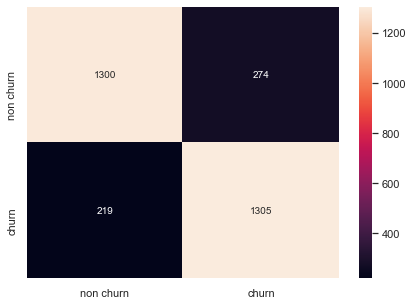


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1574
           1       0.83      0.86      0.84      1524

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

VotingClassifier accuracy mean and standard deviation for crossvalidation: 0.8411953968647049 (0.04804637782250423)
Accuracy                 0.840865
R Squared                0.363294
MSE                      0.398917
MSLE                     0.276508
CV mean                  0.841195
CV standard deviation    0.048046
Precision                0.826472
Recall                   0.856299
f1                       0.841121
Name: VotingClassifier, dtype: float64


In [627]:
fitAndAnalyseModel(VotingClassifier,"VotingClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## VotingClassifier Analysis

**Here we can see that there is very sligh increase in test data accuracy to 84.09% which is good.**

**Here we can see that there is no change in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**


Prediction: [1 1 0 ... 0 0 0]
With StackingClassifier accuracy of train data is:  0.9879634753735473
With StackingClassifier accuracy of test data is:  0.8450613298902517


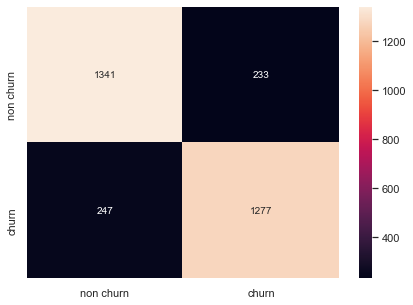


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1574
           1       0.85      0.84      0.84      1524

    accuracy                           0.85      3098
   macro avg       0.85      0.84      0.84      3098
weighted avg       0.85      0.85      0.85      3098

StackingClassifier accuracy mean and standard deviation for crossvalidation: 0.8458461844405922 (0.0553671211833849)
Accuracy                 0.845061
R Squared                0.380084
MSE                      0.393622
MSLE                     0.272838
CV mean                  0.845846
CV standard deviation    0.055367
Precision                0.845695
Recall                   0.837927
f1                       0.841793
Name: StackingClassifier, dtype: float64


In [628]:
stackingClassifier= StackingClassifier(
    estimators= [
        ('KNN', knn), 
        ('Random Forest', randomForestClassifier),
        ('Gradient Boost',gradientBoostingClassifier),
    ]
)
fitAndAnalyseModel(stackingClassifier,"StackingClassifier",x_train_res,y_train_res,x_test_res,y_test_res)

## StackingClassifier Analysis

**Here we can see that there is slight increase in test data accuracy to 84.51% which is good.**

**Here we can see that there is no change in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**


### HYPERTUNING THE MODEL

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Prediction: [1 1 0 ... 0 0 0]
With Hypertuning:GridSearchCV accuracy of train data is:  0.9125622578859989
With Hypertuning:GridSearchCV accuracy of test data is:  0.8392511297611362


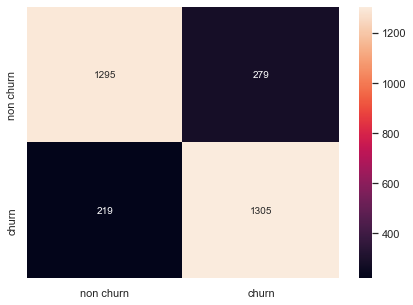


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1574
           1       0.82      0.86      0.84      1524

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Hypertuning:GridSearchCV accuracy mean and standard deviation 

In [629]:
def hypertuningModel(model, parameters):
    gsc = GridSearchCV(estimator = model, param_grid= parameters,cv= 2,verbose =1)
    fitAndAnalyseModel(gsc,"Hypertuning:GridSearchCV",x_train_res,y_train_res,x_test_res,y_test_res)
    print(f'Best hyperparameters: {gsc.best_params_}') 
    print(f'Best score: {gsc.best_score_}')
    print('Detailed GridSearchCV result is as below')
    gsc_result = pd.DataFrame(gsc.cv_results_).sort_values('mean_test_score',ascending= False)
    print(gsc_result)
    
# Commenting few parameters as its taking time to process.
# Number of trees in random forest
n_estimators = [25, 50]
max_features = [5, 10]
# Maximum number of levels in tree
max_depth = [10, 50]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
hypertuningModel(randomForestClassifier, random_grid)

**Here we can see that after the tunning the best accuracy is around 83.51**

**NOTE: We are using less parameters to hypertuning as the execution time is increasing.**

### CROSS-VALIDATION ACCUMULATED RESULT

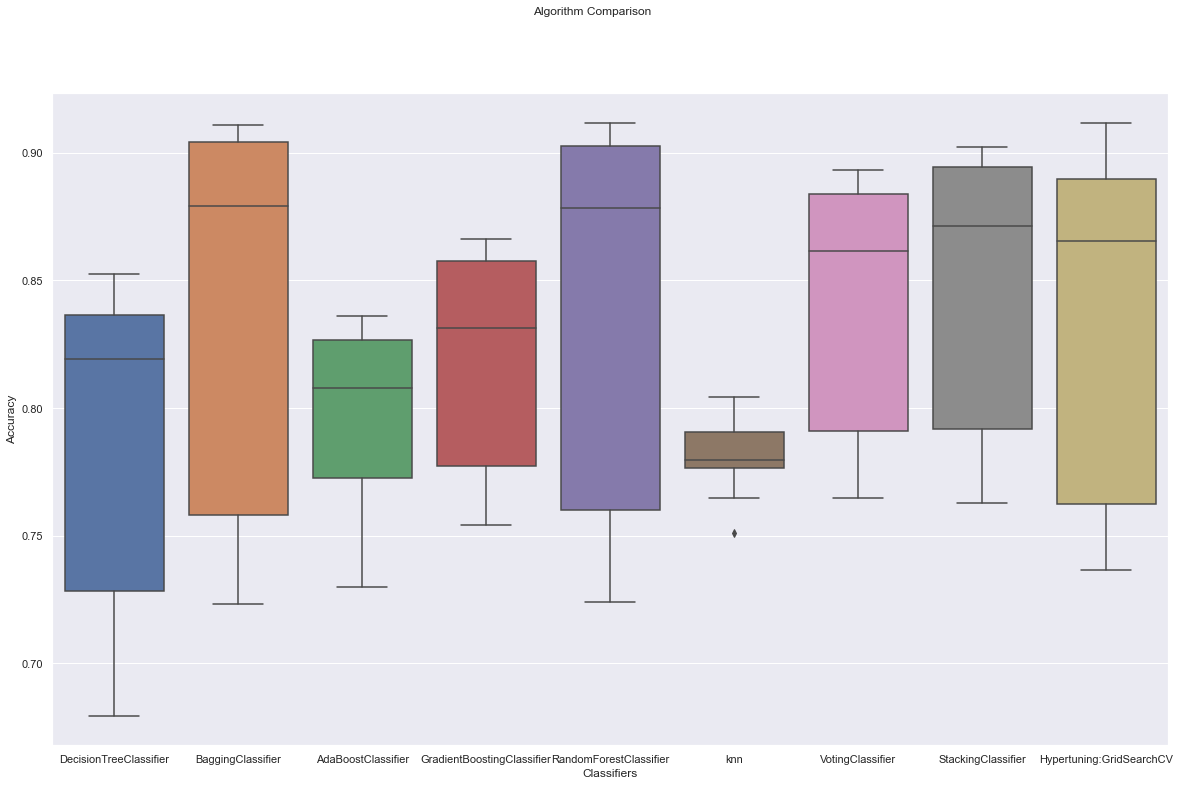

In [647]:
result=pd.DataFrame(model_accuracy).T
columndict={}
i=0
for item in names:
    columndict[i]=item
    i=i+1
result = result.rename(columns=columndict)
result
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,12))
fig.suptitle('Algorithm Comparison')
ax = sns.boxplot(x="variable",y='value', data=pd.melt(result))
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

### CROSS-VALIDATION ACCUMULATED ANALYSIS

**Here we can see that the Random forest, hypertuning GridSearchCV, VotingClassifier and Stacking Classifier have almost similar IQR range for cross validation results.**

**Random Classifier has the highest mean accuracy though it has high IQR. But the range of IQR is similar to the top performing models**

**Among Random forest, hypertuning GridSearchCV, VotingClassifier and Stacking Classifier, having highest accuracy, Random forest has better result than others in term of 25 and 75 percentile range.**

**We can say that Random forest has more consistent accuracy and have almost similar accuracy amount best performing models**

In [648]:
model_performance

Accuracy  R Squared       MSE      MSLE   CV mean  \
DecisionTreeClassifier      0.718483  -0.452264  0.530581  0.367771  0.785323   
DecisionTreeClassifier      0.773079   0.092081  0.476362  0.330189  0.785323   
DecisionTreeClassifier      0.791156   0.164405  0.456995  0.316765  0.787251   
BaggingClassifier           0.829890   0.319384  0.412444  0.285884  0.838105   
AdaBoostClassifier          0.803422   0.213481  0.443372  0.307322  0.796448   
GradientBoostingClassifier  0.822466   0.289679  0.421348  0.292056  0.818436   
RandomForestClassifier      0.840542   0.362003  0.399322  0.276789  0.839073   
knn                         0.759199   0.036547  0.490714  0.340137  0.780170   
VotingClassifier            0.840865   0.363294  0.398917  0.276508  0.841195   
StackingClassifier          0.845061   0.380084  0.393622  0.272838  0.845846   
Hypertuning:GridSearchCV    0.839251   0.356837  0.400935  0.277907  0.834035   

                            CV standard deviation  Precision    Recall  \
DecisionTreeClassifier                   0.069430   0.467005  0.497297   
DecisionTreeClassifier                   0.069430   0.761299  0.784777   
DecisionTreeClassifier                   0.044139   0.777006  0.807087   
BaggingClassifier                        0.074956   0.832555  0.818898   
AdaBoostClassifier                       0.034783   0.781885  0.832677   
GradientBoostingClassifier               0.042157   0.803995  0.845144   
RandomForestClassifier                   0.072814   0.843333  0.830052   
knn                                      0.014424   0.729363  0.811680   
VotingClassifier                         0.048046   0.826472  0.856299   
StackingClassifier                       0.055367   0.845695  0.837927   
Hypertuning:GridSearchCV                 0.067000   0.823864  0.856299   

                                  f1  
DecisionTreeClassifier      0.481675  
DecisionTreeClassifier      0.772859  
DecisionTreeClassifier      0.791761  
BaggingClassifier           0.825670  
AdaBoostClassifier          0.806482  
GradientBoostingClassifier  0.824056  
RandomForestClassifier      0.836640  
knn                         0.768323  
VotingClassifier            0.841121  
StackingClassifier          0.841793  
Hypertuning:GridSearchCV    0.839768

## Model Comparision and Analysis

**RandomForestClassifier, VotingClassifier and StackingClassifier have highest accuracy.**

**Among models with high accuracy RandomForestClassifier, VotingClassifier and StackingClassifier have better error parameters.**

**Cross validation mean and standard deviation are good for RandomForestClassifier, VotingClassifier and StackingClassifier**

**Precision recall and f1 score are best for RandomForestClassifier, VotingClassifier and StackingClassifier**

**Since Random forest has lesser execution time and more stable compare to VotingClassifier and StackingClassifier. We can consider Random forest for future.**

# Conclusion and improvisation: 

**• Write your conclusion on the results.**

**• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.**

# Write your conclusion on the results.


Reference: 

**Precision:** When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.

**Recall:** When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.

**f1-score:** Harmonic mean of precision and recall.


|	Accuracy	|	R Squared	|	MSE	|	MSLE	|	CV mean	|	CV standard deviation	|	Precision	|	Recall	|	f1	|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
|	DecisionTreeClassifier	|	0.718483	|	-0.452264	|	0.530581	|	0.367771	|	0.785323	|	0.069430	|	0.467005	|	0.497297	|	0.481675	|
|	DecisionTreeClassifier	|	0.773079	|	0.092081	|	0.476362	|	0.330189	|	0.785323	|	0.069430	|	0.761299	|	0.784777	|	0.772859	|
|	DecisionTreeClassifier	|	0.791156	|	0.164405	|	0.456995	|	0.316765	|	0.787251	|	0.044139	|	0.777006	|	0.807087	|	0.791761	|
|	BaggingClassifier	|	0.829890	|	0.319384	|	0.412444	|	0.285884	|	0.838105	|	0.074956	|	0.832555	|	0.818898	|	0.825670	|
|	AdaBoostClassifier	|	0.803422	|	0.213481	|	0.443372	|	0.307322	|	0.796448	|	0.034783	|	0.781885	|	0.832677	|	0.806482	|
|	GradientBoostingClassifier	|	0.822466	|	0.289679	|	0.421348	|	0.292056	|	0.818436	|	0.042157	|	0.803995	|	0.845144	|	0.824056	|
|	RandomForestClassifier	|	0.840542	|	0.362003	|	0.399322	|	0.276789	|	0.839073	|	0.072814	|	0.843333	|	0.830052	|	0.836640	|
|	knn	|	0.759199	|	0.036547	|	0.490714	|	0.340137	|	0.780170	|	0.014424	|	0.729363	|	0.811680	|	0.768323	|
|	VotingClassifier	|	0.840865	|	0.363294	|	0.398917	|	0.276508	|	0.841195	|	0.048046	|	0.826472	|	0.856299	|	0.841121	|
|	StackingClassifier	|	0.845061	|	0.380084	|	0.393622	|	0.272838	|	0.845846	|	0.055367	|	0.845695	|	0.837927	|	0.841793	|


## Decision Tree Analysis

**Train data Accuracy is very high but Test data accury is low, this is due to the overfitting of training data. We can restrict the depth of tree for avoid overfitting**

**We can see that precision and recall for churn=1 here are very bad 0.47 and 0.5. We are interested in predicting churn yes, hence the model is not good at all.**

**weighted recall, f1 and precision are better due to high values for churn=0. While macro avg helps in pointing out that the low scores are due to lower values for churn =1**

**Hence, we need to use sampled data.**

## Decision Tree with sampled data Analysis

**Here we cans see that there is increase in test data accuracy which is good. Next we can restrict the depth of tree for avoid overfitting**

**Here we can see that there is increase in recall precision and f1 score after sampling for churn =1 . We are interested in predicting churn yes, hence the model is better than unsampled data.**

**We can see the balanced macro and weighted avg here. This values is better than un-sampled data**

**Next we will try to remove the overfitting of training data by restricting the depth of the tree**

## Decision Tree with sampled data and restricted depth Analysis

**Here we cans see that there is increase in test data accuracy which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**


Here we can see that the columns like MonthlyCharges, TotalCharges and Contract have very high importance score.

## Bagging Classifier Analysis

**Here we can see that there is increase in test data accuracy to 83% which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

**All the cores are better than previous models analysed till now.**

## AdaBoostClassifier Analysis

**Here we can see that there is slight decrease in test data accuracy to 80.34%**

**Here we can see that there is decrease in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

## GradientBoostingClassifier Analysis

**Here we can see that test data accuracy to 82.24% is better than AdaBoostClassifier but lesser Bagging Classifier**

**The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

## RandomForestClassifier Analysis

**Here we can see that there is increase in test data accuracy to 84.05% which is good.**

**Here we can see that there is increase in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

**All the cores are better than previous models analysed till now.**

### Design your own ensemble technique using weak classifiers.

**Above we have already done the Homogeneous ensemble models analysis**

**Will be using stacking and voting for few of above classifiers like knn, random forest and gradientBoostingClassifiers**

## VotingClassifier Analysis

**Here we can see that there is very sligh increase in test data accuracy to 84.09% which is good.**

**Here we can see that there is no change in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**


## StackingClassifier Analysis

**Here we can see that there is slight increase in test data accuracy to 84.51% which is good.**

**Here we can see that there is no change in recall precision and f1 score. The scores are balanced for churn=1 and 0 which mean the model is equally good in predicting both 0 and 1 values**

**We can see the balanced macro and weighted avg here.**

## HYPERTUNING MODEL ANALYSIS

**The best accuracy after hypertuning model is around 83.51**

### CROSS-VALIDATION ACCUMULATED ANALYSIS

**Here we can see that the Random forest, hypertuning GridSearchCV, VotingClassifier and Stacking Classifier have almost similar IQR range for cross validation results.**

**Random Classifier has the highest mean accuracy though it has high IQR. But the range of IQR is similar to the top performing models**

**Among Random forest, hypertuning GridSearchCV, VotingClassifier and Stacking Classifier, having highest accuracy, Random forest has better result than others in term of 25 and 75 percentile range.**

**We can say that Random forest has more consistent accuracy and have almost similar accuracy amount best performing models**


## Model Comparision and Analysis

**RandomForestClassifier, VotingClassifier and StackingClassifier have highest accuracy.**

**Among models with high accuracy RandomForestClassifier, VotingClassifier and StackingClassifier have better error parameters.**

**Cross validation mean and standard deviation are good for RandomForestClassifier, VotingClassifier and StackingClassifier**

**Precision recall and f1 score are best for RandomForestClassifier, VotingClassifier and StackingClassifier**

**Since Random forest has lesser execution time and more stable compare to VotingClassifier and StackingClassifier. We can consider Random forest for future.**

In [528]:
import pandas_profiling 

df_profiling=df1.join(df2)
pandas_profiling.ProfileReport(df_profiling)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.**

## SUGGESTIONS

**We have no common id on the both set of separate files provided, we are assuming the data on both the files are in order of index or customer ID. No customer ID in file 2**

**We have more data on churn = no and lesser on churn =1. Since we are trying to predict churn=1 we should collect and focus more on getting churn data for better analysis and results**

**There are few data with high correlation**

**High correlated continuous data like monthly and total charges.**

**Data are highly imbalanced for churn, senior citizen, dependents and Phone service**

**Many categorical columns has 3rd category as "No Internet service" which is treated as noise and often misleading. This leads for bad modelling and prediction.**



===========================================================================================
# END